In [ ]:
!pip install langchain

In [ ]:
!pip install python-dotenv

In [ ]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.7/412.7 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.1 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.32
    Uninstalling langchain-core-0.3.32:
      Successfully uninstalled langchain-core-0.3.32


In [ ]:
!pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
import requests
from bs4 import BeautifulSoup
from langchain.tools import tool
from dotenv import load_dotenv
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain import hub
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
import operator
from typing import Annotated, List, Tuple, TypedDict
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from langchain.tools import tool
from typing import Literal
from typing import Union
from langgraph.graph import StateGraph, START
import asyncio
import getpass
import os
from IPython.display import Image, display
from langchain_core.runnables.config import RunnableConfig
import logging
import asyncio
import operator
from typing import Annotated, TypedDict

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


## Setup



In [ ]:
os.environ["OPENAI_API_KEY"] = ""
os.environ["TAVILY_API_KEY"] = ""

## MedQA

In [ ]:
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
questions_dict = {}
answers_dict = {}

with open('/content/drive/MyDrive/Colab Notebooks/Multi-supervisor/Expriments/train.jsonl', 'r') as file:
# with open('train.jsonl', 'r') as file:
    for i, line in enumerate(file):
        item = json.loads(line)

        # put questions and options in this dict
        questions_dict[f"question_{i+1}"] = {
            "question": item["question"],
            "options": item["options"]
        }

        # put answers in this dict
        answers_dict[f"question_{i+1}"] = item["answer_idx"]

In [ ]:
numbers_question = 5

In [ ]:
# pritn first 10 records
def preview_dataset():
  print("Questions Dictionary (first 15):")
  for key in list(questions_dict.keys())[:numbers_question]:
      print(f"{key}: {questions_dict[key]}")

  print("\nAnswers Dictionary (first 15):")
  for key in list(answers_dict.keys())[:numbers_question]:
      print(f"{key}: {answers_dict[key]}")

preview_dataset()

Questions Dictionary (first 15):
question_1: {'question': 'A 23-year-old pregnant woman at 22 weeks gestation presents with burning upon urination. She states it started 1 day ago and has been worsening despite drinking more water and taking cranberry extract. She otherwise feels well and is followed by a doctor for her pregnancy. Her temperature is 97.7°F (36.5°C), blood pressure is 122/77 mmHg, pulse is 80/min, respirations are 19/min, and oxygen saturation is 98% on room air. Physical exam is notable for an absence of costovertebral angle tenderness and a gravid uterus. Which of the following is the best treatment for this patient?', 'options': {'A': 'Ampicillin', 'B': 'Ceftriaxone', 'C': 'Ciprofloxacin', 'D': 'Doxycycline', 'E': 'Nitrofurantoin'}}
question_2: {'question': 'A 3-month-old baby died suddenly at night while asleep. His mother noticed that he had died only after she awoke in the morning. No cause of death was determined based on the autopsy. Which of the following preca

## APPs


In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [ ]:
# just put every tool together
tools = [TavilySearchResults(max_result=3)]

## Define the Execution Agent

In [ ]:
# https://smith.langchain.com/hub?organizationId=deb0bf59-361e-498c-ae36-2761f0c494b3
prompt = hub.pull("wfh/react-agent-executor")
prompt.pretty_print()

models = ["gpt-3.5-turbo-0125", "gpt-4-turbo-2024-04-09"]

llm = ChatOpenAI(model=models[0])

agent_executor = create_react_agent(llm, tools, messages_modifier=prompt)

================================ System Message ================================

You are a helpful assistant.

============================= Messages Placeholder =============================

{{messages}}


In [ ]:
agent_executor.invoke({"messages": [("user", "give me some cough info")]})

{'messages': [HumanMessage(content='give me some cough info', additional_kwargs={}, response_metadata={}, id='29276ee6-d082-4c60-b0c5-5958268f5386'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_bJ6X6Clb6oPXsly5OMhnOYq9', 'function': {'arguments': '{"query":"cough"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 92, 'total_tokens': 112, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d59f3499-339a-436b-8dc3-f578d6cdee0d-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'cough'}, 'id': 'call_bJ6X6Clb6oPXsly5OMhnOYq9', 'type': 'tool_call'}], usage_metadata

## Define the state

1. need to track the current plan;
2. track previously executed steps;
3. need to have some state to represent the final response as well as the original input;

In [ ]:
# class planexecute

class PlanExecute(TypedDict):
    input: str
    plan: List[str]
    past_steps: Annotated[List[Tuple], operator.add]
    response: str

## Planning Step

- Using function calling to create a plan;

In [ ]:
class Plan(BaseModel):
    """Plan to follow in future"""

    steps: List[str] = Field(
        description="different steps to follow, should be in sorted order"
    )

In [ ]:
#open ai
planner_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """For the given objective, come up with a simple step by step plan. \
If any specialized medical terms are found in the input question, use Travily_Search to search for them and include the results in the plan. \
When using the Travily_Search tool, only use the name of the disease or condition as the search query (e.g., persistent cough → cough, stroke → stroke or ischemic stroke, etc.\
And your final goal is design a plan as detailed as possible from the options given. \
At the same time, you need to discuss with multiple planners to reach a final result.\
Then you need to pass this plan to the agent through planner2.).""",
        ),
        ("placeholder", "{messages}"),
    ]
)
planner1 = planner_prompt | ChatOpenAI(
    model=models[0], temperature=0
).with_structured_output(Plan)

planner2 = planner_prompt | ChatOpenAI(
    model=models[1], temperature=0
).with_structured_output(Plan)

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1362: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1375: UserWarning: Cannot use method='json_schema' with model gpt-3.5-turbo-0125 since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1362: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or

## Re-Plan Step

In [ ]:
#open ai
class Response(BaseModel):
    """Response to user."""

    response: str


class Act(BaseModel):
    """Action to perform."""

    action: Union[Response, Plan] = Field(
        description="Action to perform. If you want to respond to user, use Response. "
        "If you need to further use tools to get the answer, use Plan."
    )


replanner_prompt = ChatPromptTemplate.from_template(
    """For the given objective, come up with a simple step by step plan. \
This plan should involve individual tasks, that if executed correctly will yield the correct answer. Do not add any superfluous steps. \
The result of the final step should be the final answer. Make sure that each step has all the information needed - do not skip steps.

Your objective was this:
{input}

Your original plan was this:
{plan}

You have currently done the follow steps:
{past_steps}

Update your plan accordingly. If no more steps are needed and you can return to the user, then respond with that. Otherwise, fill out the plan. Only add steps to the plan that still NEED to be done. Do not return previously done steps as part of the plan."""
)


replanner = replanner_prompt | ChatOpenAI(
    model=models[1], temperature=0
).with_structured_output(Act)

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1362: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1375: UserWarning: Cannot use method='json_schema' with model gpt-4-turbo-2024-04-09 since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(


## Create the Graph

In [ ]:
import tiktoken

# Define the encoder (ensure encoding variable is initialized)
encoding = tiktoken.get_encoding("cl100k_base")

async def execute_step(state: PlanExecute):
    # Extract the plan and format the first task
    plan = state["plan"]
    plan_str = "\n".join(f"{i+1}. {step}" for i, step in enumerate(plan))
    task = plan[0]
    task_formatted = f"""For the following plan:\n{plan_str}\n\nYou are tasked with executing step {1}, {task}."""

    # Calculate token usage for input
    input_tokens = len(encoding.encode(task_formatted))

    # Invoke the agent executor
    agent_response = await agent_executor.ainvoke(
        {"messages": [("user", task_formatted)]}
    )

    # Calculate token usage for output
    output_tokens = len(encoding.encode(agent_response["messages"][-1].content))

    print("AGENT_RESPONSE#############################")
    print(f"Input Tokens: {input_tokens}")
    print(f"Output Tokens: {output_tokens}")
    print(f"Total Tokens: {input_tokens + output_tokens}")

    return {
        "past_steps": [(task, agent_response["messages"][-1].content)],
        "token_usage": {
            "input_tokens": input_tokens,
            "output_tokens": output_tokens,
            "total_tokens": input_tokens + output_tokens,
        },
    }

async def plan_step1(state: PlanExecute):
    # Calculate token usage for input
    input_tokens = len(encoding.encode(state["input"]))

    # Invoke the first planner
    plan = await planner1.ainvoke({"messages": [("user", state["input"])]})

    # Calculate token usage for output
    output_text = "\n".join(plan.steps)
    output_tokens = len(encoding.encode(output_text))

    print("PLANNER1###################################")
    print(f"Input Tokens: {input_tokens}")
    print(f"Output Tokens: {output_tokens}")
    print(f"Total Tokens: {input_tokens + output_tokens}")

    return {
        "plan": plan.steps,
        "token_usage": {
            "input_tokens": input_tokens,
            "output_tokens": output_tokens,
            "total_tokens": input_tokens + output_tokens,
        },
    }

async def plan_step2(state: PlanExecute):
    # Calculate token usage for input
    input_tokens = len(encoding.encode(state["input"]))

    # Invoke the second planner
    plan = await planner2.ainvoke({"messages": [("user", state["input"])]})

    # Calculate token usage for output
    output_text = "\n".join(plan.steps)
    output_tokens = len(encoding.encode(output_text))

    print("PLANNER2###################################")
    print(f"Input Tokens: {input_tokens}")
    print(f"Output Tokens: {output_tokens}")
    print(f"Total Tokens: {input_tokens + output_tokens}")

    return {
        "plan": plan.steps,
        "token_usage": {
            "input_tokens": input_tokens,
            "output_tokens": output_tokens,
            "total_tokens": input_tokens + output_tokens,
        },
    }

async def plan_interaction(state: PlanExecute):
    plan = []
    step_input = state["input"]

    for i in range(3):
        # Calculate token usage for planner1 input
        input_tokens_p1 = len(encoding.encode(step_input))

        response1 = await planner1.ainvoke({"messages": [("user", step_input)]})
        output_text_p1 = "\n".join(response1.steps)
        output_tokens_p1 = len(encoding.encode(output_text_p1))

        print("RESPONSE1###################################")
        print(f"Input Tokens: {input_tokens_p1}")
        print(f"Output Tokens: {output_tokens_p1}")
        print(f"Total Tokens: {input_tokens_p1 + output_tokens_p1}")
        plan.append(response1.steps)
        step_input = response1.steps

        # Calculate token usage for planner2 input
        input_tokens_p2 = len(encoding.encode(step_input))

        response2 = await planner2.ainvoke({"messages": [("user", step_input)]})
        output_text_p2 = "\n".join(response2.steps)
        output_tokens_p2 = len(encoding.encode(output_text_p2))

        print("RESPONSE2###################################")
        print(f"Input Tokens: {input_tokens_p2}")
        print(f"Output Tokens: {output_tokens_p2}")
        print(f"Total Tokens: {input_tokens_p2 + output_tokens_p2}")
        plan.append(response2.steps)
        step_input = response2.steps

    return {
        "plan": [step for sublist in plan for step in sublist],
        "token_usage": {
            "input_tokens": input_tokens_p1 + input_tokens_p2,
            "output_tokens": output_tokens_p1 + output_tokens_p2,
            "total_tokens": input_tokens_p1 + input_tokens_p2 + output_tokens_p1 + output_tokens_p2,
        },
    }

async def replan_step(state: PlanExecute):
    # Convert state to dictionary if necessary
    state_dict = state if isinstance(state, dict) else state.dict()
    input_text = str(state_dict)
    input_tokens = len(encoding.encode(input_text))

    # Invoke replanner
    output = await replanner.ainvoke(state)

    # Extract output text for token calculation
    if hasattr(output, "action") and hasattr(output.action, "steps"):
        output_text = "\n".join(output.action.steps)
    elif hasattr(output, "action") and hasattr(output.action, "response"):
        output_text = output.action.response
    else:
        output_text = ""

    output_tokens = len(encoding.encode(output_text))

    print("REPLANNER###################################")
    print(f"Input Tokens: {input_tokens}")
    print(f"Output Tokens: {output_tokens}")
    print(f"Total Tokens: {input_tokens + output_tokens}")

    if isinstance(output.action, Response):
        return {
            "response": output.action.response,
            "token_usage": {
                "input_tokens": input_tokens,
                "output_tokens": output_tokens,
                "total_tokens": input_tokens + output_tokens,
            },
        }
    else:
        return {
            "plan": output.action.steps,
            "token_usage": {
                "input_tokens": input_tokens,
                "output_tokens": output_tokens,
                "total_tokens": input_tokens + output_tokens,
            },
        }

def should_stop(state: PlanExecute) -> Literal["agent", "planner1"]:
    if "plan" in state and len(state["plan"]) >= 4:
        return "agent"
    else:
        return "planner1"


def should_end(state: PlanExecute) -> Literal["agent", "__end__"]:
    if "response" in state and state["response"]:
        return "__end__"
    else:
        return "agent"


In [ ]:
workflow = StateGraph(PlanExecute)

workflow.add_node("planner1", plan_step1)
workflow.add_node("planner2", plan_step2)
workflow.add_node("agent", execute_step)
workflow.add_node("replan", replan_step)

workflow.add_edge(START, "planner1")

workflow.add_edge("planner1", "planner2")

workflow.add_conditional_edges(
    "planner2",
    should_stop,
)

workflow.add_edge("agent", "replan")

workflow.add_conditional_edges(
    "replan",
    should_end,
)

app_interaction = workflow.compile()

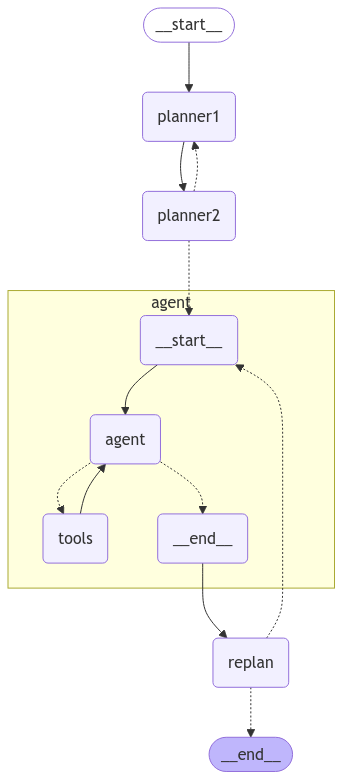

In [ ]:
display(Image(app_interaction.get_graph(xray=True).draw_mermaid_png()))

# Test

In [ ]:
import asyncio
from asyncio import CancelledError

## More recursions


In [ ]:
###### TOOLS FUNCTIONS

def extract_options_from_input(input_query):
    """
    Extract dynamic options with their content from the formatted input query.
    Returns a list of tuples where each tuple contains the option key and its content.
    """
    import re
    options_pattern = r"Options:\s*(.*?)\nPrompt"  # Match the "Options" block
    match = re.search(options_pattern, input_query, re.DOTALL)
    if match:
        options_text = match.group(1).strip()
        # Split the options into lines and extract key-value pairs
        options = [
            (line.split(":")[0].strip(), line.split(":")[1].strip())
            for line in options_text.split("\n") if ":" in line
        ]
        print(f"Extracted dynamic options with content: {options}")
        return options
    print("Failed to extract options. Default options will be used.")
    return [("A", "Default Option A"), ("B", "Default Option B"), ("C", "Default Option C"),
            ("D", "Default Option D"), ("E", "Default Option E")]

# Function to extract the best option from a value based on dynamic options
def extract_option_from_value(value, dynamic_options):
    """
    Extract the best matching option from the value, using the dynamic options list.
    """
    try:
        if isinstance(value, dict):
            for option, _ in dynamic_options:
                if (("the correct answer is {" + option.lower() + "}") in str(value).lower()) or (("the correct answer is " + option.lower())  in str(value).lower()):
                    return option
        elif isinstance(value, str):
            lower_value = value.lower()
            for option, _ in dynamic_options:
                if (("the correct answer is {" + option.lower() + "}") in str(value).lower()) or (("the correct answer is " + option.lower())  in str(value).lower()):
                    return option
    except Exception as e:
        print(f"Error extracting option from value: {e}")
    return None

# Function to format the input query
def format_question_input(question_data):
    """
    Formats question data into a string suitable for the invoke function.
    """
    question = question_data['question']
    # Format options: join each key-value pair with a colon and newline
    options = "\n".join([f"{key}: {value}" for key, value in question_data['options'].items()])

    # Create the formatted input
    formatted_input = f"""Question: {question}
Options:
{options}
Prompt: When you think you have the correct answer, you should give user the answer, like that: the correct answer is {{A}}"""
    return formatted_input.strip()


In [ ]:
value1 = "Based on the analysis of the patient's symptoms and the pathophysiology of infantile botulism, we can now compare it with the given options and select the most appropriate answer. The correct answer is {D}. \n\nExplanation: The pathophysiology of infantile botulism involves the blockade of presynaptic acetylcholine release at the neuromuscular junction. This perfectly matches option D: 'Blockade of presynaptic acetylcholine release at the neuromuscular junction'. \n\nThis mechanism explains the patient's symptoms, including weakness, ptosis, sluggish pupillary response, weak sucking and gag reflex, shallow respirations, and constipation. The botulinum toxin prevents the release of acetylcholine at the neuromuscular junction, leading to the observed flaccid paralysis and autonomic dysfunction."
dynamic_options1 = [('A', 'Ampicillin'), ('B', 'Ceftriaxone'), ('C', 'Ciprofloxacin'), ('D', 'Doxycycline'), ('E', 'Nitrofurantoin')]
print(extract_option_from_value(value1, dynamic_options1))


D


In [ ]:
import random

In [ ]:
plan_arr = []

async def invoke(input_query):
    """
    Main function to handle the recursive workflow.
    Ensures intermediate results are stored and attempts to extract the final result from the agent's output.
    """
    config = RunnableConfig(recursion_limit=15)  # Set recursion limit
    inputs = {"input": input_query}
    result = None
    recursion_count = 1
    intermediate_results = []  # Store intermediate results
    extracted_option = []

    # Extract dynamic options with content
    dynamic_options = extract_options_from_input(input_query)  # List of tuples [(A, "Ampicillin"), (B, "Ceftriaxone"), ...]
    option_keys = [opt[0] for opt in dynamic_options]  # Extract only the keys ["A", "B", ...]
    print(f"Extracted dynamic options with content: {dynamic_options}")

    print(f"***************Starting invoke with input query: {input_query}")

    try:
        # Process events incrementally

        async for event in app_interaction.astream(inputs, config=config):
            print(f"Recursion count: {recursion_count}")
            recursion_count += 1

            for key, value in event.items():
                if key != "__end__":
                    print(f"Intermediate event key: {key}, value: {value}")
                    if 'plan' in value:
                      for item in value['plan']:
                        plan_arr.append(item)
                    # Store intermediate results every 5 recursions
                    if recursion_count % 5 == 0:

                        # Extract option from value
                        extracted_option = extract_option_from_value(value, dynamic_options)
                        if extracted_option:
                            print(f"Extracted option: {extracted_option}")
                        else:
                            extracted_option = random.choice(option_keys)  # Randomly choose an option if no valid one found
                            print(f"No valid option found. Using random option: {extracted_option}")

                        intermediate_results.append((extracted_option))
                        print(f"Stored intermediate result at recursion {recursion_count}: {extracted_option}")
                        print(intermediate_results)

                    # Check for the final answer
                    if "the correct answer is" in str(value).lower():
                        print("***************Final result found during recursion.")
                        extracted_option = extract_option_from_value(value, dynamic_options)
                        return {
                            "answer": extracted_option,
                            "details": value,
                            "options": dynamic_options,
                        }

    except RuntimeError:
        print("Recursion limit reached.")
    except Exception as e:
        print(f"An error occurred: {e}")

    # Handle recursion limit without a final result
    if not result and intermediate_results:
        print("***************No final result. Returning the last intermediate result from storage.")
        last_option = intermediate_results[-1]

        result = {
            "answer": last_option,
            "details": "No final result. Using the last intermediate value.",
            "options": dynamic_options
        }
    else:
        print("No conclusive result could be determined.")
        result = {"answer": None, "details": "Failed to determine a result.", "options": dynamic_options}

    return result


In [ ]:
import time
import psutil
import logging

# Function to get memory usage in MB
def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / (1024 ** 2)  # Memory in MB

starting_question = 61
numbers_question = 15
plan_arr = []

# time, memory and recursion steps
total_time = 0
total_memory = 0

for i in range(starting_question, starting_question + numbers_question):
  print("currently process question" + str(i))
  question_data = questions_dict[f"question_{i}"]
  formatted_input = format_question_input(question_data)

  start_time = time.time()  # Start time
  start_memory = get_memory_usage()  # Start memory usage

  try:
      # Invoke the function with formatted string input
      result = await invoke(formatted_input)
      print(f"Final result for the question:", result)

  except Exception as e:
      logging.error(f"An error occurred during the test: {e}")
      recursion_count = 0

  end_time = time.time()  # End time
  end_memory = get_memory_usage()  # End memory usage

  # Calculate the time and memory used for this question
  elapsed_time = round(end_time - start_time, 10)  # Time in seconds, rounded to 10 decimal places
  memory_used = round(end_memory - start_memory, 10)  # Memory in MB, rounded to 10 decimal places

  total_time += elapsed_time
  total_memory += memory_used

# Calculate and print the average time, memory, recursion count, and interaction count per question
avg_time = round(total_time / numbers_question, 10)
avg_memory = round(total_memory / numbers_question, 10)

print("-----------------------------------------------------------------------------------------------------------------")
print(f"Average time per question: {avg_time} seconds")
print(f"Average memory used per question: {avg_memory} MB")
print("-----------------------------------------------------------------------------------------------------------------")

currently process question61
Extracted dynamic options with content: [('A', 'Sensitivity = 83%, Specificity = 95%, PPV = 80%, NPV = 96%'), ('B', 'Sensitivity = 83%, Specificity = 95%, PPV = 96%, NPV = 80%'), ('C', 'Sensitivity = 95%, Specificity = 83%, PPV = 96%, NPV = 80%'), ('D', 'Sensitivity = 80%, Specificity = 95%, PPV = 96%, NPV = 83%'), ('E', 'Sensitivity = 95%, Specificity = 83%, PPV = 80%, NPV = 96%')]
Extracted dynamic options with content: [('A', 'Sensitivity = 83%, Specificity = 95%, PPV = 80%, NPV = 96%'), ('B', 'Sensitivity = 83%, Specificity = 95%, PPV = 96%, NPV = 80%'), ('C', 'Sensitivity = 95%, Specificity = 83%, PPV = 96%, NPV = 80%'), ('D', 'Sensitivity = 80%, Specificity = 95%, PPV = 96%, NPV = 83%'), ('E', 'Sensitivity = 95%, Specificity = 83%, PPV = 80%, NPV = 96%')]
***************Starting invoke with input query: Question: A new screening test utilizing a telemedicine approach to diagnosing diabetic retinopathy has been implemented in a diabetes clinic. An opht

PLANNER1###################################
Input Tokens: 288
Output Tokens: 15
Total Tokens: 303
Recursion count: 1
Intermediate event key: planner1, value: {'plan': ['Calculate sensitivity', 'Calculate specificity', 'Calculate positive predictive value', 'Calculate negative predictive value']}


PLANNER2###################################
Input Tokens: 288
Output Tokens: 206
Total Tokens: 494
Recursion count: 2
Intermediate event key: planner2, value: {'plan': ['Calculate the total number of patients diagnosed with diabetic retinopathy by the ophthalmologist (True Positives + False Negatives).', 'Calculate the number of True Positives (TP) as the patients who tested positive in both the screening test and the ophthalmologist exam.', 'Calculate the number of False Positives (FP) as the patients who tested positive in the screening test but negative in the ophthalmologist exam.', 'Calculate the number of False Negatives (FN) as the patients who tested negative in the screening test but positive in the ophthalmologist exam.', 'Calculate the number of True Negatives (TN) as the total number of patients minus TP, FP, and FN.', 'Calculate Sensitivity as TP / (TP + FN).', 'Calculate Specificity as TN / (TN + FP).', 'Calculate Positive Predictive Value (PPV) as TP / (TP + FP).', 'Calc

AGENT_RESPONSE#############################
Input Tokens: 266
Output Tokens: 182
Total Tokens: 448
Recursion count: 3
Intermediate event key: agent, value: {'past_steps': [('Calculate the total number of patients diagnosed with diabetic retinopathy by the ophthalmologist (True Positives + False Negatives).', "I found the values we need:\n- Number of True Positives (TP) in diabetic retinopathy diagnosis: 319\n- Number of False Negatives (FN) in diabetic retinopathy diagnosis: 59\n\nNow, let's calculate the total number of patients diagnosed with diabetic retinopathy by the ophthalmologist (True Positives + False Negatives).\nThe total number of patients diagnosed with diabetic retinopathy by the ophthalmologist is the sum of True Positives (TP) and False Negatives (FN).\n\nGiven:\n- True Positives (TP) = 319\n- False Negatives (FN) = 59\n\nTotal = TP + FN\n\nTotal = 319 + 59\nTotal = 378\n\nTherefore, the total number of patients diagnosed with diabetic retinopathy by the ophthalmologis

REPLANNER###################################
Input Tokens: 748
Output Tokens: 180
Total Tokens: 928
Recursion count: 4
Intermediate event key: replan, value: {'plan': ['Calculate the number of True Positives (TP) as the patients who tested positive in both the screening test and the ophthalmologist exam.', 'Calculate the number of False Positives (FP) as the patients who tested positive in the screening test but negative in the ophthalmologist exam.', 'Calculate the number of False Negatives (FN) as the patients who tested negative in the screening test but positive in the ophthalmologist exam.', 'Calculate the number of True Negatives (TN) as the total number of patients minus TP, FP, and FN.', 'Calculate Sensitivity as TP / (TP + FN).', 'Calculate Specificity as TN / (TN + FP).', 'Calculate Positive Predictive Value (PPV) as TP / (TP + FP).', 'Calculate Negative Predictive Value (NPV) as TN / (TN + FN).', 'Select the correct answer from the options given based on the calculated value

AGENT_RESPONSE#############################
Input Tokens: 240
Output Tokens: 62
Total Tokens: 302
Recursion count: 5
Intermediate event key: agent, value: {'past_steps': [('Calculate the number of True Positives (TP) as the patients who tested positive in both the screening test and the ophthalmologist exam.', 'To calculate the number of True Positives (TP) as the patients who tested positive in both the screening test and the ophthalmologist exam, I will need the data on the number of patients who tested positive in each test. Do you have this information available, or shall I look it up for you?')]}


REPLANNER###################################
Input Tokens: 813
Output Tokens: 123
Total Tokens: 936
Recursion count: 6
Intermediate event key: replan, value: {'plan': ['Calculate the number of False Positives (FP) as the patients who tested positive in the screening test but negative in the ophthalmologist exam.', 'Calculate the number of True Negatives (TN) as the total number of patients minus TP, FP, and FN.', 'Calculate Sensitivity as TP / (TP + FN).', 'Calculate Specificity as TN / (TN + FP).', 'Calculate Positive Predictive Value (PPV) as TP / (TP + FP).', 'Calculate Negative Predictive Value (NPV) as TN / (TN + FN).', 'Select the correct answer from the options given based on the calculated values.']}


AGENT_RESPONSE#############################
Input Tokens: 180
Output Tokens: 172
Total Tokens: 352
Recursion count: 7
Intermediate event key: agent, value: {'past_steps': [('Calculate the number of False Positives (FP) as the patients who tested positive in the screening test but negative in the ophthalmologist exam.', "Based on the search results, it seems we need specific data to calculate the number of False Positives (FP) accurately. Let's perform a manual calculation based on the available information:\n\nIn a pilot study of 500 patients:\n- The screening test detected the presence of diabetic retinopathy in 250 patients.\n- An ophthalmologist exam confirmed a diagnosis of diabetic retinopathy in 200 patients who tested positive in the screening test, as well as 10 patients who tested negative in the screening test.\n\nTherefore, the number of False Positives (FP) would be the patients who tested positive in the screening test but were negative in the ophthalmologist exam. In this

REPLANNER###################################
Input Tokens: 965
Output Tokens: 94
Total Tokens: 1059
Recursion count: 8
Intermediate event key: replan, value: {'plan': ['Calculate the number of True Negatives (TN) as the total number of patients minus TP, FP, and FN.', 'Calculate Sensitivity as TP / (TP + FN).', 'Calculate Specificity as TN / (TN + FP).', 'Calculate Positive Predictive Value (PPV) as TP / (TP + FP).', 'Calculate Negative Predictive Value (NPV) as TN / (TN + FN).', 'Select the correct answer from the options given based on the calculated values.']}


AGENT_RESPONSE#############################
Input Tokens: 144
Output Tokens: 364
Total Tokens: 508
Recursion count: 9
Intermediate event key: agent, value: {'past_steps': [('Calculate the number of True Negatives (TN) as the total number of patients minus TP, FP, and FN.', "I found some resources that explain the calculation of True Negatives (TN) based on True Positives (TP), False Positives (FP), False Negatives (FN), and Total number of patients. Here are some key points from these resources:\n\n1. True Negatives (TN) can be calculated as TN = TN / (TN + FP), where TN is the number of True Negatives, FP is the number of False Positives, and the total number of patients is the sum of True Positives (TP), False Positives (FP), False Negatives (FN), and True Negatives (TN).\n\n2. The formula for True Negatives is essential for evaluating the performance of classification models.\n\n3. It is crucial to understand and extract TP, TN, FP, and FN values to assess the model's behavior accur

REPLANNER###################################
Input Tokens: 1342
Output Tokens: 70
Total Tokens: 1412
Recursion count: 10
Intermediate event key: replan, value: {'plan': ['Calculate Sensitivity as TP / (TP + FN).', 'Calculate Specificity as TN / (TN + FP).', 'Calculate Positive Predictive Value (PPV) as TP / (TP + FP).', 'Calculate Negative Predictive Value (NPV) as TN / (TN + FN).', 'Select the correct answer from the options given based on the calculated values.']}
AGENT_RESPONSE#############################
Input Tokens: 105
Output Tokens: 32
Total Tokens: 137
Recursion count: 11
Intermediate event key: agent, value: {'past_steps': [('Calculate Sensitivity as TP / (TP + FN).', 'Sure, to calculate Sensitivity, we need the values of True Positives (TP) and False Negatives (FN). Could you please provide these values?')]}


REPLANNER###################################
Input Tokens: 1364
Output Tokens: 70
Total Tokens: 1434
Recursion count: 12
Intermediate event key: replan, value: {'plan': ['Calculate Sensitivity as TP / (TP + FN).', 'Calculate Specificity as TN / (TN + FP).', 'Calculate Positive Predictive Value (PPV) as TP / (TP + FP).', 'Calculate Negative Predictive Value (NPV) as TN / (TN + FN).', 'Select the correct answer from the options given based on the calculated values.']}


AGENT_RESPONSE#############################
Input Tokens: 105
Output Tokens: 102
Total Tokens: 207
Recursion count: 13
Intermediate event key: agent, value: {'past_steps': [('Calculate Sensitivity as TP / (TP + FN).', "I found some resources on the Sensitivity calculation formula and the meaning of TP, TN, FP, and FN in medical diagnosis. Here's the formula for Sensitivity: Sensitivity = TP / (TP + FN), where TP represents true positives and FN represents false negatives.\n\nNow, I will calculate Sensitivity using the formula provided. Let's proceed with the calculation.\nI will now proceed to calculate the Sensitivity using the formula Sensitivity = TP / (TP + FN). Let's perform the calculation.")]}


REPLANNER###################################
Input Tokens: 1483
Output Tokens: 59
Total Tokens: 1542
Recursion count: 14
Intermediate event key: replan, value: {'plan': ['Calculate Specificity as TN / (TN + FP).', 'Calculate Positive Predictive Value (PPV) as TP / (TP + FP).', 'Calculate Negative Predictive Value (NPV) as TN / (TN + FN).', 'Select the correct answer from the options given based on the calculated values.']}
No valid option found. Using random option: D
Stored intermediate result at recursion 15: D
['A', 'A', 'D']


AGENT_RESPONSE#############################
Input Tokens: 92
Output Tokens: 37
Total Tokens: 129
Recursion count: 15
Intermediate event key: agent, value: {'past_steps': [('Calculate Specificity as TN / (TN + FP).', 'To calculate Specificity, we need the values of True Negatives (TN) and False Positives (FP). Please provide these values so that I can perform the calculation for you.')]}
Recursion limit reached.
***************No final result. Returning the last intermediate result from storage.
Final result for the question: {'answer': 'D', 'details': 'No final result. Using the last intermediate value.', 'options': [('A', 'Sensitivity = 83%, Specificity = 95%, PPV = 80%, NPV = 96%'), ('B', 'Sensitivity = 83%, Specificity = 95%, PPV = 96%, NPV = 80%'), ('C', 'Sensitivity = 95%, Specificity = 83%, PPV = 96%, NPV = 80%'), ('D', 'Sensitivity = 80%, Specificity = 95%, PPV = 96%, NPV = 83%'), ('E', 'Sensitivity = 95%, Specificity = 83%, PPV = 80%, NPV = 96%')]}
currently process question62


PLANNER1###################################
Input Tokens: 279
Output Tokens: 115
Total Tokens: 394
Recursion count: 1
Intermediate event key: planner1, value: {'plan': ['Phase 1: Biceps - Lifting 2.3 kg weight off a table with left hand', 'Phase 2: Cardiac muscle - Doing 20 burpees, heart rate reaching 150/min', 'Phase 3: Gastrocnemius - Electrically stimulating with a frequency of 50 Hz', 'Expectations:', '- Phase 1: Recruitment of large motor units followed by small motor units', '- Phase 2: Increase of tension with the same underlying mechanism', '- Phase 3: Increase of tension', '- Overall: No fused tetanic contraction observed']}


PLANNER2###################################
Input Tokens: 279
Output Tokens: 166
Total Tokens: 445
Recursion count: 2
Intermediate event key: planner2, value: {'plan': ['Discuss the expected outcomes for each phase and muscle of interest.', 'Phase 1: Lifting a weight primarily involves the biceps muscle. The action would start with the recruitment of small motor units, gradually increasing to larger units as more force is needed.', "Phase 2: During the burpees, the cardiac muscle's heart rate increases to 150/min. This is a response to increased demand for oxygen and involves the recruitment of more cardiac muscle fibers, but not in the same way as skeletal muscle.", 'Phase 3: Electrically stimulating the gastrocnemius at 50 Hz would likely lead to a fused tetanic contraction, where the muscle fibers are stimulated so rapidly that they do not have time to relax between stimuli, resulting in a sustained contraction.', 'Compare the expected outcomes with the options provided to select th

AGENT_RESPONSE#############################
Input Tokens: 202
Output Tokens: 411
Total Tokens: 613
Recursion count: 3
Intermediate event key: agent, value: {'past_steps': [('Discuss the expected outcomes for each phase and muscle of interest.', "To discuss the expected outcomes for each phase and muscle of interest as per the provided plan, we need to outline the specific expectations for each phase and the corresponding muscles involved:\n\n1. **Phase 1 (Lifting a weight primarily involving the biceps muscle):**\n   - **Muscle of Interest:** Biceps Muscle\n   - **Expected Outcomes:** \n     - **Recruitment of Motor Units:** Initially, small motor units are recruited to lift the weight, allowing for precise and controlled movements.\n     - **Gradual Increase in Motor Unit Size:** As the demand for force increases, larger motor units are recruited to generate more power in the biceps muscle.\n     - **Contraction of Biceps:** The biceps muscle contracts to lift the weight, demonstratin

REPLANNER###################################
Input Tokens: 911
Output Tokens: 15
Total Tokens: 926
Recursion count: 4
Intermediate event key: replan, value: {'plan': ['Compare the expected outcomes with the options provided to select the most accurate answer.']}
No valid option found. Using random option: A
Stored intermediate result at recursion 5: A
['A']
AGENT_RESPONSE#############################
Input Tokens: 46
Output Tokens: 25
Total Tokens: 71
Recursion count: 5
Intermediate event key: agent, value: {'past_steps': [('Compare the expected outcomes with the options provided to select the most accurate answer.', 'Sure, I can help with that. Could you please provide me with the expected outcomes and the options you have for comparison?')]}


REPLANNER###################################
Input Tokens: 799
Output Tokens: 15
Total Tokens: 814
Recursion count: 6
Intermediate event key: replan, value: {'plan': ['Compare the expected outcomes with the options provided to select the most accurate answer.']}


AGENT_RESPONSE#############################
Input Tokens: 46
Output Tokens: 25
Total Tokens: 71
Recursion count: 7
Intermediate event key: agent, value: {'past_steps': [('Compare the expected outcomes with the options provided to select the most accurate answer.', 'Sure, I can help with that. Could you please provide me with the expected outcomes and the options to compare them with?')]}


REPLANNER###################################
Input Tokens: 842
Output Tokens: 23
Total Tokens: 865
Recursion count: 8
Intermediate event key: replan, value: {'plan': ['Compare the expected outcomes with the options provided to select the most accurate answer.', 'Provide the correct answer to the user.']}


AGENT_RESPONSE#############################
Input Tokens: 56
Output Tokens: 136
Total Tokens: 192
Recursion count: 9
Intermediate event key: agent, value: {'past_steps': [('Compare the expected outcomes with the options provided to select the most accurate answer.', "After comparing the expected outcomes and options provided, the most accurate answer would be related to project outcomes. Project outcomes are the changes that occur as a result of actions taken in a project, typically involving improvements in products or services. Success criteria are measurable factors that define a project's overall success and help evaluate whether the project meets the expected outcomes.\n\nNow, I will provide the correct answer to you based on this comparison.\nThe correct answer is related to project outcomes and success criteria. Project outcomes are the changes that result from project actions, often involving improvements in products or services. Success criteria are measurable factors that def

PLANNER1###################################
Input Tokens: 207
Output Tokens: 116
Total Tokens: 323
Recursion count: 1
Intermediate event key: planner1, value: {'plan': ["Perform a thorough physical examination of the patient's right knee.", 'Assess for any signs of swelling, effusion, or instability in the knee.', "Conduct specific tests such as varus stress test, valgus stress test, Lachman's test, and posterior drawer test to evaluate the integrity of different knee structures.", "Based on the findings of the physical examination and tests, identify the specific structure that is likely injured in the patient's right knee.", 'Provide the correct answer to the question based on the assessment, which is the structure that is most likely injured in this case.']}


PLANNER2###################################
Input Tokens: 207
Output Tokens: 40
Total Tokens: 247
Recursion count: 2
Intermediate event key: planner2, value: {'plan': ['Discuss the case with Planner 2 to determine the correct answer based on the symptoms and test results provided.', 'Pass the final decision to Planner 1 for confirmation and to provide the answer to the user.']}


PLANNER1###################################
Input Tokens: 207
Output Tokens: 127
Total Tokens: 334
Recursion count: 3
Intermediate event key: planner1, value: {'plan': ["Assess the patient's history of injury, noting the mechanism of injury and any symptoms experienced.", "Perform a thorough physical examination of the patient's knee, including assessing for swelling, effusion, sensation, strength, and stability through various stress tests.", "Based on the physical examination findings, specifically the increased laxity on valgus stress test compared to the contralateral knee, and the absence of laxity on Lachman's and posterior drawer tests, conclude that the patient has likely injured the medial collateral ligament (MCL).", 'Provide the correct answer to the user: the correct answer is C: Medial collateral ligament.']}
***************Final result found during recursion.
Final result for the question: {'answer': 'C', 'details': {'plan': ["Assess the patient's history of injury, notin

PLANNER1###################################
Input Tokens: 336
Output Tokens: 135
Total Tokens: 471
Recursion count: 1
Intermediate event key: planner1, value: {'plan': ['Evaluate the clinical presentation and laboratory findings.', 'Consider the differential diagnosis, including conditions like nephrotic syndrome, acute glomerulonephritis, and post-streptococcal glomerulonephritis.', 'Based on the history of sore throat, periorbital edema, proteinuria, and fatty casts in urine, suspect post-streptococcal glomerulonephritis.', 'Confirm the diagnosis by checking anti-streptolysin O levels.', 'The most appropriate next step in management for post-streptococcal glomerulonephritis is to check Anti-streptolysin O levels (Option C).']}


PLANNER2###################################
Input Tokens: 336
Output Tokens: 65
Total Tokens: 401
Recursion count: 2
Intermediate event key: planner2, value: {'plan': ['Discuss the case with Planner1 to determine the most appropriate next step in management based on the clinical presentation and laboratory findings.', 'Discuss the case with Planner2 to gather additional insights and confirm the initial plan.', 'Discuss the case with Planner3 to finalize the decision on the most appropriate management step.', 'Provide the final answer to the user.']}


AGENT_RESPONSE#############################
Input Tokens: 111
Output Tokens: 173
Total Tokens: 284
Recursion count: 3
Intermediate event key: agent, value: {'past_steps': [('Discuss the case with Planner1 to determine the most appropriate next step in management based on the clinical presentation and laboratory findings.', "I found some information related to case management processes that may be helpful in discussing the case with Planner1 to determine the most appropriate next step in management:\n\n1. [Indeed - Case Management Process](https://www.indeed.com/career-advice/career-development/case-management-process): This discusses the importance of reviewing the progress of a patient's condition after implementing a personalized treatment plan and considering the next steps to take.\n\n2. [AJ Case Management - Stages of Case Management](https://ajcasemanagement.com/stages-case-management-7-steps/): Provides an overview of the 7 stages of successful case management, including engagem

REPLANNER###################################
Input Tokens: 629
Output Tokens: 41
Total Tokens: 670
Recursion count: 4
Intermediate event key: replan, value: {'plan': ['Discuss the case with Planner2 to gather additional insights and confirm the initial plan.', 'Discuss the case with Planner3 to finalize the decision on the most appropriate management step.', 'Provide the final answer to the user.']}
No valid option found. Using random option: A
Stored intermediate result at recursion 5: A
['A']


AGENT_RESPONSE#############################
Input Tokens: 77
Output Tokens: 170
Total Tokens: 247
Recursion count: 5
Intermediate event key: agent, value: {'past_steps': [('Discuss the case with Planner2 to gather additional insights and confirm the initial plan.', 'I found some links related to planners and contacts. You can explore these options to keep track of contacts and possibly find a way to contact Planner2:\n1. [Contacts list planner - Weekly Planner Girl](https://weeklyplannergirl.com/contacts-list-planner/)\n2. [Contact List Planner Inserts - Cloth and Paper](https://www.clothandpaper.com/products/contact-list-planner-inserts-refreshed-design)\n3. [Contact list personal planner - Etsy](https://www.etsy.com/market/contact_list_personal_planner)\n4. [Contacts PDF template - Passion Planner](https://passionplanner.com/products/contacts)\n5. [Contact list planner - Etsy](https://www.etsy.com/market/contact_list_planner)\n\nYou may find relevant contact information or tools to a

REPLANNER###################################
Input Tokens: 800
Output Tokens: 25
Total Tokens: 825
Recursion count: 6
Intermediate event key: replan, value: {'plan': ['Discuss the case with Planner3 to finalize the decision on the most appropriate management step.', 'Provide the final answer to the user.']}


AGENT_RESPONSE#############################
Input Tokens: 60
Output Tokens: 75
Total Tokens: 135
Recursion count: 7
Intermediate event key: agent, value: {'past_steps': [('Discuss the case with Planner3 to finalize the decision on the most appropriate management step.', "I couldn't find specific contact information for Planner3. However, you can visit the following link to potentially get in touch with their support team: [Planner3 Contact Page](https://zenplanner.com/contact-us/).\n\nPlease reach out to them to discuss the case and finalize the decision on the most appropriate management step. Let me know if you need further assistance.")]}


REPLANNER###################################
Input Tokens: 880
Output Tokens: 11
Total Tokens: 891
Recursion count: 8
Intermediate event key: replan, value: {'response': 'The correct answer is D: Prednisone therapy.'}
***************Final result found during recursion.
Final result for the question: {'answer': 'D', 'details': {'response': 'The correct answer is D: Prednisone therapy.'}, 'options': [('A', 'Enalapril therapy'), ('B', 'Furosemide therapy'), ('C', 'Anti-streptolysin O levels'), ('D', 'Prednisone therapy'), ('E', 'Cyclosporine therapy')]}
currently process question65
Extracted dynamic options with content: [('A', 'Loss of arm abduction'), ('B', 'Loss of finger abducton'), ('C', 'Loss of forearm flexion and supination'), ('D', 'Loss of thumb opposition'), ('E', 'Loss of wrist extension')]
Extracted dynamic options with content: [('A', 'Loss of arm abduction'), ('B', 'Loss of finger abducton'), ('C', 'Loss of forearm flexion and supination'), ('D', 'Loss of thumb opposition')

PLANNER1###################################
Input Tokens: 159
Output Tokens: 146
Total Tokens: 305
Recursion count: 1
Intermediate event key: planner1, value: {'plan': ["Perform a thorough physical examination of the patient's arms and hands.", 'Focus on assessing the strength and function of the muscles and nerves in the affected areas.', 'Look for any signs of weakness, sensory changes, or abnormal reflexes during the examination.', "Based on the patient's symptoms of 'pins and needles' along the posterior forearms, left more than the right, pay particular attention to the distribution of symptoms and any specific patterns of sensory changes.", 'Consider the recent ACL tear repair as a potential contributing factor to the paresthesias in the arms.', 'Based on the location and distribution of symptoms, expect to find a specific physical examination finding that corresponds to the affected nerves or muscles in the posterior forearms, left more than the right.']}


PLANNER2###################################
Input Tokens: 159
Output Tokens: 44
Total Tokens: 203
Recursion count: 2
Intermediate event key: planner2, value: {'plan': ['Discuss the case with Planner1 to determine the most likely physical examination finding based on the symptoms described.', 'Select the correct answer from the options provided based on the discussion with Planner1.', 'Provide the user with the correct answer.']}


PLANNER1###################################
Input Tokens: 159
Output Tokens: 138
Total Tokens: 297
Recursion count: 3
Intermediate event key: planner1, value: {'plan': ["Perform a thorough physical examination of the patient's arms and hands.", 'Focus on assessing the strength and function of the muscles and nerves in the affected areas.', 'Look for any signs of weakness, sensory changes, or abnormal reflexes during the examination.', "Based on the patient's symptoms of 'pins and needles' along the posterior forearms, left more than the right, pay particular attention to the distribution of symptoms and any specific patterns of sensory changes.", 'Consider the recent ACL tear repair as a potential contributing factor to the paresthesias in the arms.', 'Based on the location and distribution of symptoms, expect to find loss of forearm flexion and supination as a physical examination finding in this patient.']}


PLANNER2###################################
Input Tokens: 159
Output Tokens: 63
Total Tokens: 222
Recursion count: 4
Intermediate event key: planner2, value: {'plan': ['Discuss the symptoms and possible related conditions with Planner1.', 'Discuss the symptoms and possible related conditions with Planner2.', 'Discuss the symptoms and possible related conditions with Planner3.', 'Reach a consensus on the most likely physical examination finding based on the symptoms described.', 'Select the correct answer from the options provided based on the consensus reached.']}
No valid option found. Using random option: B
Stored intermediate result at recursion 5: B
['B']


AGENT_RESPONSE#############################
Input Tokens: 98
Output Tokens: 27
Total Tokens: 125
Recursion count: 5
Intermediate event key: agent, value: {'past_steps': [('Discuss the symptoms and possible related conditions with Planner1.', "I couldn't find specific information related to Planner1. Would you like me to try another search or gather information from a different source?")]}


REPLANNER###################################
Input Tokens: 283
Output Tokens: 46
Total Tokens: 329
Recursion count: 6
Intermediate event key: replan, value: {'plan': ['Discuss the symptoms and possible related conditions with a medical expert or reliable medical source.', 'Reach a consensus on the most likely physical examination finding based on the symptoms described.', 'Select the correct answer from the options provided based on the consensus reached.']}


AGENT_RESPONSE#############################
Input Tokens: 82
Output Tokens: 230
Total Tokens: 312
Recursion count: 7
Intermediate event key: agent, value: {'past_steps': [('Discuss the symptoms and possible related conditions with a medical expert or reliable medical source.', 'I have found some resources that list common symptoms and related conditions. Here are a few links you can explore to discuss the symptoms and possible related conditions with a medical expert or reliable medical source:\n\n1. [NHS Inform - A to Z list of common illnesses and conditions](https://www.nhsinform.scot/illnesses-and-conditions/a-to-z): This page provides information on a wide range of common illnesses and conditions, including their symptoms, causes, and treatments.\n\n2. [The Health Site - List of diseases and conditions affecting bones and joints](https://www.thehealthsite.com/list-of-diseases-and-conditions/): Explore common symptoms of bone and joint diseases and the conditions that affect them.\

REPLANNER###################################
Input Tokens: 520
Output Tokens: 30
Total Tokens: 550
Recursion count: 8
Intermediate event key: replan, value: {'plan': ['Reach a consensus on the most likely physical examination finding based on the symptoms described.', 'Select the correct answer from the options provided based on the consensus reached.']}
AGENT_RESPONSE#############################
Input Tokens: 64
Output Tokens: 26
Total Tokens: 90
Recursion count: 9
Intermediate event key: agent, value: {'past_steps': [('Reach a consensus on the most likely physical examination finding based on the symptoms described.', 'Sure, please provide me with the symptoms described so that I can help in reaching a consensus on the most likely physical examination finding.')]}
No valid option found. Using random option: E
Stored intermediate result at recursion 10: E
['B', 'E']


REPLANNER###################################
Input Tokens: 548
Output Tokens: 11
Total Tokens: 559
Recursion count: 10
Intermediate event key: replan, value: {'response': 'The correct answer is E: Loss of wrist extension.'}
***************Final result found during recursion.
Final result for the question: {'answer': 'E', 'details': {'response': 'The correct answer is E: Loss of wrist extension.'}, 'options': [('A', 'Loss of arm abduction'), ('B', 'Loss of finger abducton'), ('C', 'Loss of forearm flexion and supination'), ('D', 'Loss of thumb opposition'), ('E', 'Loss of wrist extension')]}
currently process question66
Extracted dynamic options with content: [('A', 'Closed-loop communication'), ('B', 'Near miss'), ('C', 'Root cause analysis'), ('D', 'Sentinel event'), ('E', 'Two patient identifiers')]
Extracted dynamic options with content: [('A', 'Closed-loop communication'), ('B', 'Near miss'), ('C', 'Root cause analysis'), ('D', 'Sentinel event'), ('E', 'Two patient identifiers')]
*

PLANNER1###################################
Input Tokens: 167
Output Tokens: 19
Total Tokens: 186
Recursion count: 1
Intermediate event key: planner1, value: {'plan': ['Implement closed-loop communication to minimize the risk of verbal misunderstandings in dose communication during handovers.']}


PLANNER2###################################
Input Tokens: 167
Output Tokens: 30
Total Tokens: 197
Recursion count: 2
Intermediate event key: planner2, value: {'plan': ['Discuss the options with multiple planners to determine the best approach to minimize verbal misunderstanding in medication administration.', 'Pass the selected answer to the agent through planner1.']}
PLANNER1###################################
Input Tokens: 167
Output Tokens: 22
Total Tokens: 189
Recursion count: 3
Intermediate event key: planner1, value: {'plan': ['Implement closed-loop communication to minimize the risk of verbal misunderstandings in dose communication during handovers in the future.']}


PLANNER2###################################
Input Tokens: 167
Output Tokens: 43
Total Tokens: 210
Recursion count: 4
Intermediate event key: planner2, value: {'plan': ['Discuss the options with multiple planners to determine the best approach to minimize verbal misunderstanding errors in medication administration.', 'Select the most appropriate management option from the given choices based on the discussion.', 'Provide the final answer to the user.']}
No valid option found. Using random option: D
Stored intermediate result at recursion 5: D
['D']


PLANNER1###################################
Input Tokens: 167
Output Tokens: 93
Total Tokens: 260
Recursion count: 5
Intermediate event key: planner1, value: {'plan': ['Understand the importance of minimizing errors in medication administration', 'Review the incident involving the erroneous dose of intravenous phenytoin', 'Identify the causative factors leading to the event, including verbal misunderstanding during handover', 'Consider the options provided: A) Closed-loop communication, B) Near miss, C) Root cause analysis, D) Sentinel event, E) Two patient identifiers', 'Select the most appropriate management strategy to minimize the risk of similar errors in the future']}


PLANNER2###################################
Input Tokens: 167
Output Tokens: 33
Total Tokens: 200
Recursion count: 6
Intermediate event key: planner2, value: {'plan': ['Discuss the options with multiple planners to determine the best approach to minimize the risk of verbal misunderstanding in medication administration.', 'Pass the selected answer to the agent through planner1.']}


PLANNER1###################################
Input Tokens: 167
Output Tokens: 67
Total Tokens: 234
Recursion count: 7
Intermediate event key: planner1, value: {'plan': ['Understand the importance of minimizing errors in medication administration', 'Review the incident report and investigation findings', 'Identify the causative factors leading to the error', 'Consider the potential solutions to prevent similar errors in the future', 'Evaluate the effectiveness and feasibility of each solution', 'Select the most appropriate management strategy to minimize the risk of medication errors in the future']}


PLANNER2###################################
Input Tokens: 167
Output Tokens: 29
Total Tokens: 196
Recursion count: 8
Intermediate event key: planner2, value: {'plan': ['Discuss with multiple planners to reach a final result.', 'Select the right answer from the options given.', 'Pass the plan to the agent through planner1.']}


PLANNER1###################################
Input Tokens: 167
Output Tokens: 59
Total Tokens: 226
Recursion count: 9
Intermediate event key: planner1, value: {'plan': ['Understand the importance of minimizing errors in medication administration', 'Review the incident report and investigation findings', 'Identify the causative factors leading to the error', 'Consider the potential solutions to prevent similar errors in the future', 'Evaluate the effectiveness and feasibility of each solution', 'Select the most appropriate management strategy to implement']}
No valid option found. Using random option: B
Stored intermediate result at recursion 10: B
['D', 'B']


PLANNER2###################################
Input Tokens: 167
Output Tokens: 43
Total Tokens: 210
Recursion count: 10
Intermediate event key: planner2, value: {'plan': ['Discuss the options with multiple planners to determine the best approach to minimize verbal misunderstanding errors in medication administration.', 'Select the most appropriate management option from the given choices based on the discussion.', 'Provide the final answer to the user.']}


PLANNER1###################################
Input Tokens: 167
Output Tokens: 93
Total Tokens: 260
Recursion count: 11
Intermediate event key: planner1, value: {'plan': ['Understand the importance of minimizing errors in medication administration', 'Review the incident report and investigation findings', 'Identify the causative factors leading to the error', 'Focus on the verbal misunderstanding of the dose of phenytoin during handover', 'Consider the most appropriate management strategies to prevent similar errors in the future', 'Evaluate the options provided: A) Closed-loop communication, B) Near miss, C) Root cause analysis, D) Sentinel event, E) Two patient identifiers']}


PLANNER2###################################
Input Tokens: 167
Output Tokens: 42
Total Tokens: 209
Recursion count: 12
Intermediate event key: planner2, value: {'plan': ['Discuss the options with multiple planners to determine the best approach to minimize verbal misunderstanding in medication administration.', 'Select the most appropriate management option from the given choices based on the discussion.', 'Provide the final answer to the user.']}


PLANNER1###################################
Input Tokens: 167
Output Tokens: 20
Total Tokens: 187
Recursion count: 13
Intermediate event key: planner1, value: {'plan': ['Implement closed-loop communication to minimize the risk of verbal misunderstandings in dose orders during patient handovers.']}


PLANNER2###################################
Input Tokens: 167
Output Tokens: 29
Total Tokens: 196
Recursion count: 14
Intermediate event key: planner2, value: {'plan': ['Discuss with multiple planners to reach a final result.', 'Select the right answer from the options given.', 'Pass the plan to the agent through planner1.']}
No valid option found. Using random option: B
Stored intermediate result at recursion 15: B
['D', 'B', 'B']
PLANNER1###################################
Input Tokens: 167
Output Tokens: 39
Total Tokens: 206
Recursion count: 15
Intermediate event key: planner1, value: {'plan': ['Understand the importance of minimizing the risk of medication errors', 'Review the options provided in the question', 'Identify the most appropriate management strategy based on the scenario', 'Select the correct answer from the options']}
Recursion limit reached.
***************No final result. Returning the last intermediate result from storage.
Final result for the question: {'answer': '

PLANNER1###################################
Input Tokens: 253
Output Tokens: 65
Total Tokens: 318
Recursion count: 1
Intermediate event key: planner1, value: {'plan': ['Educate Mr. P about the risks of HCM', 'Consult with a cardiologist for further evaluation and recommendations', "Discuss the situation with the team's legal counsel to understand the implications of restricting Mr. P's participation", 'Document all interactions and decisions made for legal purposes', "Consider involving the player's union representative for support and guidance"]}


PLANNER2###################################
Input Tokens: 253
Output Tokens: 72
Total Tokens: 325
Recursion count: 2
Intermediate event key: planner2, value: {'plan': ['Search for information on hypertrophic cardiomyopathy using Travily_Search.', 'Discuss the risks associated with hypertrophic cardiomyopathy and physical exertion.', 'Evaluate the ethical responsibilities of a physician in managing a patient with a potentially life-threatening condition.', 'Consider the implications of each option provided in the question.', 'Select the most appropriate next step based on medical ethics and patient safety.']}


AGENT_RESPONSE#############################
Input Tokens: 110
Output Tokens: 469
Total Tokens: 579
Recursion count: 3
Intermediate event key: agent, value: {'past_steps': [('Search for information on hypertrophic cardiomyopathy using Travily_Search.', 'I have retrieved information on hypertrophic cardiomyopathy from multiple sources. Here are some key points:\n\n1. [National Center for Biotechnology Information (NCBI) - Hypertrophic Cardiomyopathy](https://www.ncbi.nlm.nih.gov/books/NBK430788/): Hypertrophic cardiomyopathy (HCM) is an autosomal dominant cardiac myocyte disease caused by mutations in sarcomere and sarcomere-related protein genes. It leads to increased left ventricular wall thickness (hypertrophy) causing dynamic left ventricular outflow obstruction.\n   \n2. [Johns Hopkins Medicine - Hypertrophic Cardiomyopathy](https://www.hopkinsmedicine.org/health/conditions-and-diseases/hypertrophic-cardiomyopathy): HCM is a genetic disease that causes thickening of the heart muscle

REPLANNER###################################
Input Tokens: 854
Output Tokens: 58
Total Tokens: 912
Recursion count: 4
Intermediate event key: replan, value: {'plan': ['Discuss the risks associated with hypertrophic cardiomyopathy and physical exertion.', 'Evaluate the ethical responsibilities of a physician in managing a patient with a potentially life-threatening condition.', 'Consider the implications of each option provided in the question.', 'Select the most appropriate next step based on medical ethics and patient safety.']}
No valid option found. Using random option: C
Stored intermediate result at recursion 5: C
['C']


AGENT_RESPONSE#############################
Input Tokens: 95
Output Tokens: 325
Total Tokens: 420
Recursion count: 5
Intermediate event key: agent, value: {'past_steps': [('Discuss the risks associated with hypertrophic cardiomyopathy and physical exertion.', '### Risks Associated with Hypertrophic Cardiomyopathy and Physical Exertion:\n\n1. **Increased Risk of Sudden Cardiac Death (SCD):**\n   - Guidelines recommend against competitive sports participation for individuals with hypertrophic cardiomyopathy (HCM) due to the unstable substrate created by vigorous physical exertion, leading to increased susceptibility to SCD.\n\n2. **Physiological Concerns with Exercise:**\n   - Detailed understanding of the physiological consequences of aerobic training in HCM patients is lacking.\n   - Concerns include exercise-related worsening of the phenotype (e.g., promoting hypertrophy and fibrosis) and triggering of arrhythmia.\n\n3. **Exercise-Associated Sudden Cardiac Arrest (SCA) in HCM:**\n   -

REPLANNER###################################
Input Tokens: 1201
Output Tokens: 43
Total Tokens: 1244
Recursion count: 6
Intermediate event key: replan, value: {'plan': ['Evaluate the ethical responsibilities of a physician in managing a patient with a potentially life-threatening condition.', 'Consider the implications of each option provided in the question.', 'Select the most appropriate next step based on medical ethics and patient safety.']}


AGENT_RESPONSE#############################
Input Tokens: 81
Output Tokens: 221
Total Tokens: 302
Recursion count: 7
Intermediate event key: agent, value: {'past_steps': [('Evaluate the ethical responsibilities of a physician in managing a patient with a potentially life-threatening condition.', 'To evaluate the ethical responsibilities of a physician in managing a patient with a potentially life-threatening condition, we need to consider several key ethical principles that guide medical practice. These principles include:\n\n1. **Beneficence**: The physician has a duty to act in the best interest of the patient and provide care that maximizes benefits and minimizes harm.\n2. **Autonomy**: Respecting the patient\'s right to make their own decisions about their care, including the right to accept or refuse treatment.\n3. **Non-maleficence**: The principle of "do no harm", which requires physicians to avoid actions that could harm the patient.\n4. **Justice**: Ensuring fair and equitable

REPLANNER###################################
Input Tokens: 1439
Output Tokens: 25
Total Tokens: 1464
Recursion count: 8
Intermediate event key: replan, value: {'plan': ['Consider the implications of each option provided in the question.', 'Select the most appropriate next step based on medical ethics and patient safety.']}
AGENT_RESPONSE#############################
Input Tokens: 54
Output Tokens: 18
Total Tokens: 72
Recursion count: 9
Intermediate event key: agent, value: {'past_steps': [('Consider the implications of each option provided in the question.', 'Sure, please provide me with the options you would like me to consider the implications of.')]}
No valid option found. Using random option: E
Stored intermediate result at recursion 10: E
['C', 'E']


REPLANNER###################################
Input Tokens: 1451
Output Tokens: 124
Total Tokens: 1575
Recursion count: 10
Intermediate event key: replan, value: {'plan': ['Educate Mr. P about the risks of HCM and the potential consequences of playing with this condition.', "Discuss the situation with the team's legal and ethical advisors to understand the implications of allowing or restricting Mr. P's play.", 'Make a decision based on the medical evidence, ethical considerations, and legal advice.', 'Inform Mr. P, the coach, and the team owner of the decision and the reasons behind it.', "Implement the decision, ensuring that all necessary medical support is in place to monitor Mr. P's health during the game if he is allowed to play, or to provide care if he is restricted from playing."]}


AGENT_RESPONSE#############################
Input Tokens: 169
Output Tokens: 440
Total Tokens: 609
Recursion count: 11
Intermediate event key: agent, value: {'past_steps': [('Educate Mr. P about the risks of HCM and the potential consequences of playing with this condition.', "To educate Mr. P about the risks of Hypertrophic Cardiomyopathy (HCM) and the potential consequences of playing with this condition, it's essential to provide him with comprehensive and accurate information. Here are some key points to cover when discussing HCM with Mr. P:\n\n1. **Explanation of HCM**: \n   - Define what HCM is and how it affects the heart muscle.\n   - Clarify that it is a genetic condition that causes the heart muscle to thicken, making it harder for the heart to pump blood effectively.\n\n2. **Risks of Playing with HCM**:\n   - Emphasize the potential dangers of strenuous physical activity with HCM, including the risk of sudden cardiac arrest during exercise.\n   - Highlight that engaging in i

REPLANNER###################################
Input Tokens: 2042
Output Tokens: 103
Total Tokens: 2145
Recursion count: 12
Intermediate event key: replan, value: {'plan': ["Discuss the situation with the team's legal and ethical advisors to understand the implications of allowing or restricting Mr. P's play.", 'Make a decision based on the medical evidence, ethical considerations, and legal advice.', 'Inform Mr. P, the coach, and the team owner of the decision and the reasons behind it.', "Implement the decision, ensuring that all necessary medical support is in place to monitor Mr. P's health during the game if he is allowed to play, or to provide care if he is restricted from playing."]}


AGENT_RESPONSE#############################
Input Tokens: 150
Output Tokens: 345
Total Tokens: 495
Recursion count: 13
Intermediate event key: agent, value: {'past_steps': [("Discuss the situation with the team's legal and ethical advisors to understand the implications of allowing or restricting Mr. P's play.", "I found some information that may help in understanding the implications of allowing or restricting a player from playing in sports:\n\n1. [Player discipline and legal rights](https://lawslearned.com/player-discipline-and-legal-rights/): This intersection within sports law considers ethical considerations and legal frameworks, impacting an athlete's career and legal protections.\n\n2. [Sports law in the United States](https://en.wikipedia.org/wiki/Sports_law_in_the_United_States): Sports law in the U.S. overlaps with labor law, contract law, competition law, and tort law. It covers issues like defamation, privacy rights, and the role of player-agents.\n\n3. [Principles of gove

REPLANNER###################################
Input Tokens: 2404
Output Tokens: 5
Total Tokens: 2409
Recursion count: 14
Intermediate event key: replan, value: {'response': 'The correct answer is D'}
Extracted option: D
Stored intermediate result at recursion 15: D
['C', 'E', 'D']
***************Final result found during recursion.
Final result for the question: {'answer': 'D', 'details': {'response': 'The correct answer is D'}, 'options': [('A', 'Consult with a psychiatrist to have Mr. P committed'), ('B', 'Call the police and have Mr. P arrested'), ('C', 'Allow Mr. P to play against medical advice'), ('D', 'Educate Mr. P about the risks of HCM'), ('E', 'Schedule a repeat EKG for the following morning')]}
currently process question68
Extracted dynamic options with content: [('A', 'High-dose glucocorticoids'), ('B', 'Cyclophosphamide and rituximab'), ('C', 'Vancomycin and cefepime'), ('D', 'Plasma exchange therapy'), ('E', 'Urgent laparoscopic splenectomy')]
Extracted dynamic options wi

PLANNER1###################################
Input Tokens: 237
Output Tokens: 149
Total Tokens: 386
Recursion count: 1
Intermediate event key: planner1, value: {'plan': ["Assess the patient's vital signs and general appearance.", "Review the patient's symptoms and medical history.", 'Perform a physical examination, focusing on neurological deficits.', 'Order and review initial laboratory studies, including hematocrit, platelets, and serum creatinine.', 'Consider the differential diagnosis based on the clinical presentation and laboratory findings.', 'Based on the clinical scenario of a 37-year-old woman with malaise, weakness, headache, nausea, vomiting, diarrhea, low hematocrit, low platelets, and elevated serum creatinine, suspect thrombotic thrombocytopenic purpura (TTP).', 'The most appropriate treatment for TTP is plasma exchange therapy.', 'Select option D: Plasma exchange therapy as the most appropriate treatment at this time.']}


PLANNER2###################################
Input Tokens: 237
Output Tokens: 41
Total Tokens: 278
Recursion count: 2
Intermediate event key: planner2, value: {'plan': ["Review the patient's symptoms and lab results.", 'Consider the possible diagnoses based on the symptoms and lab results.', 'Match the appropriate treatment option to the most likely diagnosis.', 'Select the correct answer from the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 72
Output Tokens: 84
Total Tokens: 156
Recursion count: 3
Intermediate event key: agent, value: {'past_steps': [("Review the patient's symptoms and lab results.", "I have found information on understanding lab test results and how they correlate with symptoms. It's important to consider the symptoms experienced by the patient and interpret the lab results in conjunction with these symptoms. Additionally, the symptoms can help pinpoint the underlying cause of abnormal results.\n\nDo you need more specific information related to the patient's symptoms and lab results, or is there anything else you would like me to do next in the process?")]}


REPLANNER###################################
Input Tokens: 395
Output Tokens: 32
Total Tokens: 427
Recursion count: 4
Intermediate event key: replan, value: {'plan': ['Consider the possible diagnoses based on the symptoms and lab results.', 'Match the appropriate treatment option to the most likely diagnosis.', 'Select the correct answer from the options provided.']}
No valid option found. Using random option: A
Stored intermediate result at recursion 5: A
['A']


AGENT_RESPONSE#############################
Input Tokens: 64
Output Tokens: 147
Total Tokens: 211
Recursion count: 5
Intermediate event key: agent, value: {'past_steps': [('Consider the possible diagnoses based on the symptoms and lab results.', "Based on the search results, the process of considering possible diagnoses based on symptoms and lab results involves creating a list of conditions that could be causing the symptoms presented by the patient. This list of possible conditions helps healthcare providers decide which tests will confirm or rule out the conditions that may be causing the symptoms.\n\nTo perform a comprehensive evaluation for possible diagnoses, healthcare providers must gather clues by asking about the patient's health, review the symptoms, ask about the medical history, and conduct relevant tests. The differential diagnosis process involves ruling out conditions that share similar symptoms until the most likely cause of the illness is identified.\n\nIf you have sp

REPLANNER###################################
Input Tokens: 550
Output Tokens: 20
Total Tokens: 570
Recursion count: 6
Intermediate event key: replan, value: {'plan': ['Match the appropriate treatment option to the most likely diagnosis.', 'Select the correct answer from the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 49
Output Tokens: 24
Total Tokens: 73
Recursion count: 7
Intermediate event key: agent, value: {'past_steps': [('Match the appropriate treatment option to the most likely diagnosis.', 'Sure, I can assist with that. Could you please provide me with the list of diagnoses and treatment options to match?')]}


REPLANNER###################################
Input Tokens: 575
Output Tokens: 39
Total Tokens: 614
Recursion count: 8
Intermediate event key: replan, value: {'plan': ["Identify the most likely diagnosis based on the patient's presentation and lab results.", 'Match the identified diagnosis with the appropriate treatment option from the provided choices.', 'Select the correct answer from the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 73
Output Tokens: 55
Total Tokens: 128
Recursion count: 9
Intermediate event key: agent, value: {'past_steps': [("Identify the most likely diagnosis based on the patient's presentation and lab results.", "To proceed with identifying the most likely diagnosis based on the patient's presentation and lab results, I will need information about the patient's symptoms, medical history, and relevant lab results. Please provide me with the necessary details so that I can assist you in determining the likely diagnosis.")]}
No valid option found. Using random option: D
Stored intermediate result at recursion 10: D
['A', 'D']


REPLANNER###################################
Input Tokens: 668
Output Tokens: 39
Total Tokens: 707
Recursion count: 10
Intermediate event key: replan, value: {'plan': ["Identify the most likely diagnosis based on the patient's presentation and lab results.", 'Match the identified diagnosis with the appropriate treatment option from the provided choices.', 'Select the correct answer from the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 73
Output Tokens: 159
Total Tokens: 232
Recursion count: 11
Intermediate event key: agent, value: {'past_steps': [("Identify the most likely diagnosis based on the patient's presentation and lab results.", "I have found some information that might help in identifying the most likely diagnosis based on the patient's presentation and lab results. Here are some key points to consider:\n\n1. The patient presentation should include a concise summary of history, physical examination, and laboratory results leading to the chosen diagnosis.\n2. Abnormal lab test results may influence the diagnosis and treatment plan.\n3. Persuasive presentation highlighting pertinent positives and negatives related to the diagnosis can aid in making a diagnosis.\n4. Understanding and interpreting lab results are integral to patient care and treatment decisions.\n\nThese points emphasize the importance of considering the patient's history, physical exami

REPLANNER###################################
Input Tokens: 852
Output Tokens: 39
Total Tokens: 891
Recursion count: 12
Intermediate event key: replan, value: {'plan': ["Identify the most likely diagnosis based on the patient's presentation and lab results.", 'Match the identified diagnosis with the appropriate treatment option from the provided choices.', 'Select the correct answer from the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 73
Output Tokens: 31
Total Tokens: 104
Recursion count: 13
Intermediate event key: agent, value: {'past_steps': [("Identify the most likely diagnosis based on the patient's presentation and lab results.", "I can help with that. Could you please provide me with the patient's presentation and lab results so that I can assist in identifying the most likely diagnosis?")]}


REPLANNER###################################
Input Tokens: 902
Output Tokens: 39
Total Tokens: 941
Recursion count: 14
Intermediate event key: replan, value: {'plan': ["Identify the most likely diagnosis based on the patient's presentation and lab results.", 'Match the identified diagnosis with the appropriate treatment option from the provided choices.', 'Select the correct answer from the options provided.']}
No valid option found. Using random option: C
Stored intermediate result at recursion 15: C
['A', 'D', 'C']


AGENT_RESPONSE#############################
Input Tokens: 73
Output Tokens: 29
Total Tokens: 102
Recursion count: 15
Intermediate event key: agent, value: {'past_steps': [("Identify the most likely diagnosis based on the patient's presentation and lab results.", "I can help with that. Please provide me with the patient's presentation and lab results so that I can assist in identifying the most likely diagnosis.")]}
Recursion limit reached.
***************No final result. Returning the last intermediate result from storage.
Final result for the question: {'answer': 'C', 'details': 'No final result. Using the last intermediate value.', 'options': [('A', 'High-dose glucocorticoids'), ('B', 'Cyclophosphamide and rituximab'), ('C', 'Vancomycin and cefepime'), ('D', 'Plasma exchange therapy'), ('E', 'Urgent laparoscopic splenectomy')]}
currently process question69
Extracted dynamic options with content: [('A', 'Prostaglandin E1 infusion'), ('B', 'Indomethacin infusion'), ('C', 'Surgical liga

PLANNER2###################################
Input Tokens: 225
Output Tokens: 25
Total Tokens: 250
Recursion count: 2
Intermediate event key: planner2, value: {'plan': ['Discuss the case with Planner1 to determine the most appropriate next step in management after confirming the diagnosis via echocardiography.']}


PLANNER1###################################
Input Tokens: 225
Output Tokens: 163
Total Tokens: 388
Recursion count: 3
Intermediate event key: planner1, value: {'plan': ['Confirm the diagnosis of patent ductus arteriosus (PDA) via echocardiography.', "Assess the severity of the PDA and its impact on the infant's health.", "Consider the infant's age, weight, and overall condition in determining the appropriate management strategy.", "Given the grade 4/6 continuous murmur and the infant's age, weight, and clinical presentation, the most appropriate next step in management is to initiate Prostaglandin E1 infusion to maintain ductal patency and ensure adequate systemic blood flow.", 'Monitor the infant closely for any signs of deterioration or complications, and adjust the management plan accordingly based on the clinical response.', "Provide reassurance and education to the parents regarding the condition and the treatment plan, and schedule follow-up appointments to assess the infant's pr

PLANNER2###################################
Input Tokens: 225
Output Tokens: 155
Total Tokens: 380
Recursion count: 4
Intermediate event key: planner2, value: {'plan': ['1. Review the clinical presentation and findings: A 5-week-old infant with a grade 4/6 continuous murmur heard best at the left infraclavicular area.', '2. Consider the significance of the murmur: A continuous murmur in an infant suggests a congenital heart defect, possibly a patent ductus arteriosus (PDA).', '3. Confirm the diagnosis: An echocardiography would be used to confirm if the murmur is due to PDA.', '4. Determine the appropriate management based on the confirmed diagnosis: If PDA is confirmed, consider the treatment options.', '5. Choose the correct treatment option from the given choices based on the standard treatment protocol for PDA in infants.', '6. Select the right answer from the options provided.']}
No valid option found. Using random option: B
Stored intermediate result at recursion 5: B
['B']


AGENT_RESPONSE#############################
Input Tokens: 224
Output Tokens: 197
Total Tokens: 421
Recursion count: 5
Intermediate event key: agent, value: {'past_steps': [('1. Review the clinical presentation and findings: A 5-week-old infant with a grade 4/6 continuous murmur heard best at the left infraclavicular area.', 'After conducting a search, I found some information related to a grade 4/6 continuous murmur in a 5-week-old infant:\n\n1. The grade 4 murmur is described as loud with a thrill (palpable vibration of the chest wall) present, louder than the first and second heart sounds.\n2. Continuous murmurs are usually more intense in diastole and may be heard best in specific areas like the infraclavicular region.\n3. Murmurs are graded on a scale of 1 to 6 based on how loud they are, with grade 6 being very loud.\n\nBased on this information, the presence of a grade 4/6 continuous murmur in a 5-week-old infant is significant and may require further evaluation to determine the 

REPLANNER###################################
Input Tokens: 646
Output Tokens: 119
Total Tokens: 765
Recursion count: 6
Intermediate event key: replan, value: {'plan': ['2. Consider the significance of the murmur: A continuous murmur in an infant suggests a congenital heart defect, possibly a patent ductus arteriosus (PDA).', '3. Confirm the diagnosis: An echocardiography would be used to confirm if the murmur is due to PDA.', '4. Determine the appropriate management based on the confirmed diagnosis: If PDA is confirmed, consider the treatment options.', '5. Choose the correct treatment option from the given choices based on the standard treatment protocol for PDA in infants.', '6. Select the right answer from the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 185
Output Tokens: 95
Total Tokens: 280
Recursion count: 7
Intermediate event key: agent, value: {'past_steps': [('2. Consider the significance of the murmur: A continuous murmur in an infant suggests a congenital heart defect, possibly a patent ductus arteriosus (PDA).', 'A continuous murmur in an infant could suggest a congenital heart defect, potentially a patent ductus arteriosus (PDA). Continuous murmurs are not common in normal hearts and can be indicative of underlying cardiac issues. It is recommended to consider consulting a cardiologist and performing an ultrasound of the heart to further investigate the significance of the murmur. This evaluation is crucial to determine the cause of the murmur and identify any potential congenital heart abnormalities like PDA.')]}


REPLANNER###################################
Input Tokens: 743
Output Tokens: 83
Total Tokens: 826
Recursion count: 8
Intermediate event key: replan, value: {'plan': ['3. Confirm the diagnosis: An echocardiography would be used to confirm if the murmur is due to PDA.', '4. Determine the appropriate management based on the confirmed diagnosis: If PDA is confirmed, consider the treatment options.', '5. Choose the correct treatment option from the given choices based on the standard treatment protocol for PDA in infants.', '6. Select the right answer from the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 136
Output Tokens: 183
Total Tokens: 319
Recursion count: 9
Intermediate event key: agent, value: {'past_steps': [('3. Confirm the diagnosis: An echocardiography would be used to confirm if the murmur is due to PDA.', 'Echocardiography is the preferred procedure to confirm the diagnosis and characterize Patent Ductus Arteriosus (PDA). Doppler echocardiography is efficient in grading PDA and is essential in evaluating clinically significant ductal shunting. It helps identify different patterns of PDA shunt.\n\nYou may refer to the following sources for more information:\n1. [PubMed - Echocardiography for characterizing PDA diagnosis](https://pubmed.ncbi.nlm.nih.gov/19757330/)\n2. [AHA Journals - Echocardiogram for confirming PDA diagnosis](https://www.ahajournals.org/doi/full/10.1161/circulationaha.105.592063)\n3. [PMC - Echocardiography as the investigation of choice for PDA diagnosis](https://pmc.ncbi.nlm.nih.gov/articles/PMC77

REPLANNER###################################
Input Tokens: 924
Output Tokens: 57
Total Tokens: 981
Recursion count: 10
Intermediate event key: replan, value: {'plan': ['4. Determine the appropriate management based on the confirmed diagnosis: If PDA is confirmed, consider the treatment options.', '5. Choose the correct treatment option from the given choices based on the standard treatment protocol for PDA in infants.', '6. Select the right answer from the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 104
Output Tokens: 169
Total Tokens: 273
Recursion count: 11
Intermediate event key: agent, value: {'past_steps': [('4. Determine the appropriate management based on the confirmed diagnosis: If PDA is confirmed, consider the treatment options.', "Based on the search results, the standard treatment options for Patent Ductus Arteriosus (PDA) in infants can include the following approaches:\n\n1. Nonsteroidal anti-inflammatory drugs (NSAIDs) like Indomethacin or Ibuprofen can be prescribed for premature babies to help the ductus arteriosus close on its own.\n2. In more severe cases of PDA, pediatric cardiologists may perform a cardiac catheterization to close the ductus arteriosus using medical devices.\n3. Surgical ligation may be considered as a treatment option for infants with PDA, especially in certain conditions.\n\nThese options may vary based on the severity of the condition and the individual patient's needs. It is essenti

REPLANNER###################################
Input Tokens: 1097
Output Tokens: 34
Total Tokens: 1131
Recursion count: 12
Intermediate event key: replan, value: {'plan': ['5. Choose the correct treatment option from the given choices based on the standard treatment protocol for PDA in infants.', '6. Select the right answer from the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 78
Output Tokens: 254
Total Tokens: 332
Recursion count: 13
Intermediate event key: agent, value: {'past_steps': [('5. Choose the correct treatment option from the given choices based on the standard treatment protocol for PDA in infants.', 'The standard treatment protocol for PDA (Patent Ductus Arteriosus) in infants involves the following steps:\n- Use standard dose ibuprofen (3 doses of 10, 5, 5 mg/kg at 24 hourly intervals) as routine first-line pharmacological treatment of hsPDA in babies < 21 days of age.\n- Use oral (rather than IV) ibuprofen if the baby is receiving full enteral feeds.\n- Re-assess the ductus arteriosus and ductal shunt after 3 days.\n- A second course of high dose ibuprofen (3 doses of 20, 10, 10 mg/kg at 24 hourly intervals) can be considered if the baby is still under 21 days of age.\n- Consider diuretics in babies with echo evidence of left heart volume overload.\n\nIf the PDA is still present at dis

REPLANNER###################################
Input Tokens: 1362
Output Tokens: 5
Total Tokens: 1367
Recursion count: 14
Intermediate event key: replan, value: {'response': 'the correct answer is A'}
Extracted option: A
Stored intermediate result at recursion 15: A
['B', 'C', 'A']
***************Final result found during recursion.
Final result for the question: {'answer': 'A', 'details': {'response': 'the correct answer is A'}, 'options': [('A', 'Prostaglandin E1 infusion'), ('B', 'Indomethacin infusion'), ('C', 'Surgical ligation'), ('D', 'Reassurance and follow-up'), ('E', 'Percutaneous surgery')]}
currently process question70
Extracted dynamic options with content: [('A', 'Acquired factor VIII deficiency'), ('B', 'Loss of antithrombin III'), ('C', 'Impaired estrogen degradation'), ('D', 'Antiphospholipid antibodies'), ('E', 'Paraneoplastic erythropoietin production')]
Extracted dynamic options with content: [('A', 'Acquired factor VIII deficiency'), ('B', 'Loss of antithrombin III')

PLANNER1###################################
Input Tokens: 299
Output Tokens: 115
Total Tokens: 414
Recursion count: 1
Intermediate event key: planner1, value: {'plan': ["Assess the patient's history and symptoms.", 'Perform a physical examination to identify any signs of fluid overload or kidney-related issues.', 'Order relevant tests such as urinalysis, CT scan of the abdomen, and blood tests to assess liver function and coagulation profile.', 'Evaluate the results of the tests to determine the underlying cause of the renal vein findings.', "Consider the patient's history of chronic hepatitis B infection, frequent flying, and other symptoms in the diagnostic process.", 'Based on the findings, identify the most likely cause of the renal vein findings among the options provided in the question.']}


PLANNER2###################################
Input Tokens: 299
Output Tokens: 19
Total Tokens: 318
Recursion count: 2
Intermediate event key: planner2, value: {'plan': ['Discuss with multiple planners to reach a final result.', 'Select the right answer from the options given.']}


PLANNER1###################################
Input Tokens: 299
Output Tokens: 292
Total Tokens: 591
Recursion count: 3
Intermediate event key: planner1, value: {'plan': ["Assess the patient's history and symptoms: 51-year-old woman with right flank pain, bloody urine, lower extremity swelling, weight gain, chronic hepatitis B infection, frequent travel, fatigue, periorbital edema, distended abdomen, and lower extremity edema.", 'Review the findings from the physical examination and investigations: Pulse 98/min, respirations 18/min, blood pressure 135/75 mm Hg, nodular liver with ascites, large right kidney with collateral vessels, filling defect in right renal vein, urinalysis showing 4+ protein, positive glucose, and fatty casts.', "Consider the differential diagnosis based on the patient's presentation and findings: Renal vein thrombosis is suspected due to the filling defect in the right renal vein. Evaluate potential causes such as acquired factor VIII deficiency, loss of antithromb

PLANNER2###################################
Input Tokens: 299
Output Tokens: 49
Total Tokens: 348
Recursion count: 4
Intermediate event key: planner2, value: {'plan': ["Discuss with multiple planners to reach a final result on the most likely underlying cause of the patient's renal vein findings.", 'Select the right answer from the options given based on the discussion and analysis.', 'Pass the selected answer to the agent through planner1.']}
No valid option found. Using random option: D
Stored intermediate result at recursion 5: D
['D']


PLANNER1###################################
Input Tokens: 299
Output Tokens: 232
Total Tokens: 531
Recursion count: 5
Intermediate event key: planner1, value: {'plan': ["Assess the patient's history and symptoms: 51-year-old woman with right flank pain, bloody urine, lower extremity swelling, weight gain, chronic hepatitis B infection, frequent travel, fatigue, periorbital edema, distended abdomen, and lower extremity edema.", 'Review the findings from the physical examination and investigations: pulse 98/min, respirations 18/min, blood pressure 135/75 mm Hg, nodular liver with ascites, large right kidney with collateral vessels, filling defect in right renal vein, urinalysis showing 4+ protein, positive glucose, and fatty casts.', "Consider the differential diagnosis based on the patient's presentation and findings: renal vein thrombosis with nephrotic syndrome, likely due to underlying cause.", 'Evaluate the options provided: A) Acquired factor VIII deficiency, B) Loss of antithrombi

PLANNER2###################################
Input Tokens: 299
Output Tokens: 52
Total Tokens: 351
Recursion count: 6
Intermediate event key: planner2, value: {'plan': ["Discuss the patient's symptoms and medical history with Planner2.", 'Analyze the CT scan findings and urinalysis results with Planner3.', 'Determine the most likely underlying cause of the renal vein findings with Planner4.', 'Select the correct answer from the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 85
Output Tokens: 171
Total Tokens: 256
Recursion count: 7
Intermediate event key: agent, value: {'past_steps': [("Discuss the patient's symptoms and medical history with Planner2.", "I found some information that may help you discuss the patient's symptoms and medical history with Planner2. You can refer to these sources:\n\n1. [Quizlet Flashcards on Patient's Medical History](https://quizlet.com/655986908/pbs-211-building-a-medical-history-flash-cards/): This resource includes information about the patient's chief complaint, current health issues, symptoms, treatments, tests, nutrition, allergies, medications, and health habits.\n   \n2. [Quizlet Flashcards on Mastering Microbiology](https://quizlet.com/396566543/mastering-microbiology-ch-22-flash-cards/): These flashcards provide guidance on using the patient's medical history and symptoms to form a hypothesis about the patient's disease.\n\nFeel free to explore these resourc

REPLANNER###################################
Input Tokens: 562
Output Tokens: 34
Total Tokens: 596
Recursion count: 8
Intermediate event key: replan, value: {'plan': ['Analyze the CT scan findings and urinalysis results.', 'Determine the most likely underlying cause of the renal vein findings.', 'Select the correct answer from the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 65
Output Tokens: 171
Total Tokens: 236
Recursion count: 9
Intermediate event key: agent, value: {'past_steps': [('Analyze the CT scan findings and urinalysis results.', 'Based on the information gathered from the CT scan findings and urinalysis results:\n\n### CT Scan Findings:\n1. Widened renal vein(s) containing thrombus\n2. Thrombus in the IVC\n3. Renal enlargement\n4. Thickened Gerota fascia\n5. Formation of pericapsular venous collaterals\n6. Abnormal renal parenchymal enhancement pattern\n\nCT scans are useful for diagnosing conditions like renal vein thrombosis, renal vein abnormalities, and vascular anomalies related to the kidneys.\n\n### Urinalysis Results:\nThe urinalysis indicated findings related to renal vein thrombosis and renal papillary necrosis. Urinalysis is essential for identifying urinary abnormalities and can provide insights into kidney-related conditions.\n\nIf you need more detailed analysis or further

REPLANNER###################################
Input Tokens: 737
Output Tokens: 22
Total Tokens: 759
Recursion count: 10
Intermediate event key: replan, value: {'plan': ['Determine the most likely underlying cause of the renal vein findings.', 'Select the correct answer from the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 51
Output Tokens: 104
Total Tokens: 155
Recursion count: 11
Intermediate event key: agent, value: {'past_steps': [('Determine the most likely underlying cause of the renal vein findings.', 'After conducting a search, I found that the most likely underlying cause of renal vein findings, specifically renal vein thrombosis, can be attributed to several factors such as dehydration, sepsis, nephrotic syndrome, primary hypercoagulability disorders, malignancies (e.g., renal cell carcinoma), and extrinsic compression. It is also associated with conditions like sickle cell disease, diabetes that affects the kidneys, and use of oral contraceptives. Would you like more information on any specific cause mentioned?')]}


REPLANNER###################################
Input Tokens: 844
Output Tokens: 144
Total Tokens: 988
Recursion count: 12
Intermediate event key: replan, value: {'plan': ["Review the patient's clinical presentation and history, including symptoms of right flank pain, bloody urine, lower extremity swelling, weight gain, chronic hepatitis B, and frequent flying.", 'Analyze the CT scan and urinalysis findings, noting the nodular liver, ascites, large right kidney with collateral vessels, renal vein filling defect, proteinuria, glucose, and fatty casts.', "Correlate the clinical and diagnostic findings with potential causes of renal vein thrombosis, considering the patient's history of chronic hepatitis B and other relevant factors.", 'Match the findings and potential causes with the provided options to determine the most likely underlying cause of the renal vein findings.', 'Select the correct answer from the options provided based on the analysis.']}


AGENT_RESPONSE#############################
Input Tokens: 203
Output Tokens: 85
Total Tokens: 288
Recursion count: 13
Intermediate event key: agent, value: {'past_steps': [("Review the patient's clinical presentation and history, including symptoms of right flank pain, bloody urine, lower extremity swelling, weight gain, chronic hepatitis B, and frequent flying.", "To review the patient's clinical presentation and history, including symptoms of right flank pain, bloody urine, lower extremity swelling, weight gain, chronic hepatitis B, and frequent flying, we need to gather information about the symptoms and medical history of the patient. Would you like me to search for general information related to these symptoms, or do you have specific details or a case study in mind that you would like me to review?")]}


REPLANNER###################################
Input Tokens: 1092
Output Tokens: 36
Total Tokens: 1128
Recursion count: 14
Intermediate event key: replan, value: {'plan': ['Match the findings and potential causes with the provided options to determine the most likely underlying cause of the renal vein findings.', 'Select the correct answer from the options provided based on the analysis.']}
No valid option found. Using random option: E
Stored intermediate result at recursion 15: E
['D', 'A', 'E']


AGENT_RESPONSE#############################
Input Tokens: 77
Output Tokens: 48
Total Tokens: 125
Recursion count: 15
Intermediate event key: agent, value: {'past_steps': [('Match the findings and potential causes with the provided options to determine the most likely underlying cause of the renal vein findings.', 'To match the findings and potential causes with the provided options to determine the most likely underlying cause of the renal vein findings, I will need the findings and potential causes as well as the options provided. Could you please provide me with that information?')]}
Recursion limit reached.
***************No final result. Returning the last intermediate result from storage.
Final result for the question: {'answer': 'E', 'details': 'No final result. Using the last intermediate value.', 'options': [('A', 'Acquired factor VIII deficiency'), ('B', 'Loss of antithrombin III'), ('C', 'Impaired estrogen degradation'), ('D', 'Antiphospholipid antibodies'), ('E', 'Paraneopla

PLANNER1###################################
Input Tokens: 225
Output Tokens: 61
Total Tokens: 286
Recursion count: 1
Intermediate event key: planner1, value: {'plan': ['Identify the condition based on the given information.', 'Search for the microscopic findings that underlie the same pathomechanism as the cellular changes seen in the patient.', "Review the options to match the findings with the patient's condition.", "Select the option that corresponds to the microscopic findings in the patient's case."]}


PLANNER2###################################
Input Tokens: 225
Output Tokens: 33
Total Tokens: 258
Recursion count: 2
Intermediate event key: planner2, value: {'plan': ["Discuss the case with Planner1 to determine the correct answer based on the provided options and the patient's condition.", 'Pass the final decision to the agent through Planner1.']}


PLANNER1###################################
Input Tokens: 225
Output Tokens: 105
Total Tokens: 330
Recursion count: 3
Intermediate event key: planner1, value: {'plan': ['Identify the condition based on the clinical presentation and findings: chronic, retrosternal chest pain, worse at night and after heavy meals, ulcerations in the distal esophagus, proximally dislocated Z-line, columnar epithelium with goblet cells on biopsy of the distal esophagus', 'Search for microscopic findings that underlie the same pathomechanism as the cellular changes seen in this patient', 'Review the options provided and match the correct microscopic finding with the cellular changes seen in the patient']}


PLANNER2###################################
Input Tokens: 225
Output Tokens: 33
Total Tokens: 258
Recursion count: 4
Intermediate event key: planner2, value: {'plan': ["Discuss the case with Planner1 to determine the correct answer based on the provided options and the patient's condition.", 'Pass the final decision to the agent through Planner1.']}
No valid option found. Using random option: E
Stored intermediate result at recursion 5: E
['E']


PLANNER1###################################
Input Tokens: 225
Output Tokens: 125
Total Tokens: 350
Recursion count: 5
Intermediate event key: planner1, value: {'plan': ['Identify the condition based on the clinical presentation and findings: chronic, retrosternal chest pain, worse at night and after heavy meals, ulcerations in the distal esophagus, proximally dislocated Z-line, columnar epithelium with goblet cells on biopsy of the distal esophagus.', 'Search for microscopic findings that underlie the same pathomechanism as the cellular changes seen in this patient.', 'Review the options provided and match the microscopic findings with the cellular changes seen in the patient.', 'Select the option that corresponds to the correct microscopic findings underlying the pathomechanism in the patient.']}


PLANNER2###################################
Input Tokens: 225
Output Tokens: 70
Total Tokens: 295
Recursion count: 6
Intermediate event key: planner2, value: {'plan': ['Discuss the pathomechanism of the cellular changes seen in the patient with planner1.', 'Discuss the pathomechanism of the cellular changes seen in the patient with planner2.', 'Discuss the pathomechanism of the cellular changes seen in the patient with planner3.', 'Select the correct answer from the options given based on the discussions with the planners.']}


AGENT_RESPONSE#############################
Input Tokens: 110
Output Tokens: 47
Total Tokens: 157
Recursion count: 7
Intermediate event key: agent, value: {'past_steps': [('Discuss the pathomechanism of the cellular changes seen in the patient with planner1.', 'Sure, I can help with that. Could you provide me with details or context about the cellular changes seen in the patient with planner1? This will enable me to provide a detailed discussion on the pathomechanism of those changes.')]}


REPLANNER###################################
Input Tokens: 381
Output Tokens: 20
Total Tokens: 401
Recursion count: 8
Intermediate event key: replan, value: {'response': 'The correct answer is A: Pseudostratified columnar epithelium in the bronchi'}
***************Final result found during recursion.
Final result for the question: {'answer': 'A', 'details': {'response': 'The correct answer is A: Pseudostratified columnar epithelium in the bronchi'}, 'options': [('A', 'Pseudostratified columnar epithelium in the bronchi'), ('B', 'Squamous epithelium in the bladder'), ('C', 'Paneth cells in the duodenum'), ('D', 'Branching muscularis mucosa in the jejunum'), ('E', 'Disorganized squamous epithelium in the endocervix')]}
currently process question72
Extracted dynamic options with content: [('A', 'Gluten-free diet'), ('B', 'Pancreatic enzyme replacement'), ('C', 'Tetracycline therapy'), ('D', 'Mesalamine therapy'), ('E', 'Lactose-free diet')]
Extracted dynamic options with content: [('A', '

PLANNER1###################################
Input Tokens: 216
Output Tokens: 75
Total Tokens: 291
Recursion count: 1
Intermediate event key: planner1, value: {'plan': ["Assess the patient's symptoms and medical history.", 'Perform a physical examination to identify any specific signs.', 'Order relevant tests such as urinalysis after a D-xylose meal.', 'Review the test results to confirm the diagnosis.', 'Consider the possible treatment options for the condition.', "Select the treatment option that is most likely to have prevented the patient's weight loss based on the diagnosis."]}


PLANNER2###################################
Input Tokens: 216
Output Tokens: 81
Total Tokens: 297
Recursion count: 2
Intermediate event key: planner2, value: {'plan': ['Discuss the symptoms and findings: weight loss, bloating, diarrhea, bilateral white spots on the conjunctiva, dry skin, hard neck mass, increased renal D-xylose excretion.', 'Analyze the symptoms and findings to identify possible underlying conditions.', 'Review the options provided and determine which treatment aligns with the identified condition.', "Select the most appropriate option that could have prevented the patient's weight loss."]}


AGENT_RESPONSE#############################
Input Tokens: 142
Output Tokens: 280
Total Tokens: 422
Recursion count: 3
Intermediate event key: agent, value: {'past_steps': [('Discuss the symptoms and findings: weight loss, bloating, diarrhea, bilateral white spots on the conjunctiva, dry skin, hard neck mass, increased renal D-xylose excretion.', 'To discuss the symptoms and findings provided:\n\n1. **Weight Loss:** Unexplained weight loss can be a concerning symptom and may indicate various underlying health conditions such as hyperthyroidism, diabetes, cancer, or malabsorption issues.\n\n2. **Bloating:** Bloating can occur due to several reasons including digestive issues like irritable bowel syndrome (IBS), lactose intolerance, or gastrointestinal infections.\n\n3. **Diarrhea:** Chronic diarrhea can be a result of infections, inflammatory bowel disease (IBD), celiac disease, or other gastrointestinal disorders.\n\n4. **Bilateral White Spots on the Conjunctiva:** These white spots may

REPLANNER###################################
Input Tokens: 653
Output Tokens: 42
Total Tokens: 695
Recursion count: 4
Intermediate event key: replan, value: {'plan': ['Analyze the symptoms and findings to identify possible underlying conditions.', 'Review the options provided and determine which treatment aligns with the identified condition.', "Select the most appropriate option that could have prevented the patient's weight loss."]}
No valid option found. Using random option: E
Stored intermediate result at recursion 5: E
['E']


AGENT_RESPONSE#############################
Input Tokens: 74
Output Tokens: 202
Total Tokens: 276
Recursion count: 5
Intermediate event key: agent, value: {'past_steps': [('Analyze the symptoms and findings to identify possible underlying conditions.', "I have found some information on symptoms and findings related to unexplained weight loss. Here are some common findings and conditions associated with unexplained weight loss:\n\n1. Symptoms associated with unexplained weight loss include a significant decrease in body weight that occurs without a deliberate effort to lose weight.\n2. Unexplained weight loss is often considered a concerning symptom and can be associated with various underlying medical conditions such as peptic ulcer, inflammatory bowel disease (IBD), and cancer.\n3. Unintentional loss of at least 5% of body weight over a period of six to 12 months is considered unexplained weight loss.\n\nBased on this information, the identified conditions related to unexplained weigh

REPLANNER###################################
Input Tokens: 838
Output Tokens: 30
Total Tokens: 868
Recursion count: 6
Intermediate event key: replan, value: {'plan': ['Review the options provided and determine which treatment aligns with the identified condition.', "Select the most appropriate option that could have prevented the patient's weight loss."]}


AGENT_RESPONSE#############################
Input Tokens: 63
Output Tokens: 147
Total Tokens: 210
Recursion count: 7
Intermediate event key: agent, value: {'past_steps': [('Review the options provided and determine which treatment aligns with the identified condition.', 'I have found information on treatments for weight loss. Here are some options that align with the identified condition of weight loss:\n\n1. **Ozempic (semaglutide):** An FDA-approved medication for type 2 diabetes that can also assist in weight loss.\n2. **Metformin:** This anti-diabetic drug is used off-label as an adjunct to other weight loss therapies.\n3. **Topamax (topiramate):** A drug used for epilepsy or migraine, which can spur weight loss.\n4. **Mounjaro, Zepbound (tirzepatide):** Another anti-diabetic drug that can promote weight loss.\n\nThese are some treatments that can help with weight loss.')]}


REPLANNER###################################
Input Tokens: 996
Output Tokens: 51
Total Tokens: 1047
Recursion count: 8
Intermediate event key: replan, value: {'plan': ['Identify the most likely underlying condition based on the symptoms and findings.', 'Match the identified condition with the appropriate treatment option from the list provided.', "Select the most appropriate option that could have prevented the patient's weight loss.", 'Provide the correct answer to the user.']}


AGENT_RESPONSE#############################
Input Tokens: 85
Output Tokens: 49
Total Tokens: 134
Recursion count: 9
Intermediate event key: agent, value: {'past_steps': [('Identify the most likely underlying condition based on the symptoms and findings.', 'Based on the search results, the most likely underlying conditions based on the symptoms of weight loss and fatigue include Hyperthyroidism, Hypercalcemia, cancer, and mental health disorders. These conditions can manifest with symptoms of weight loss and fatigue.')]}
No valid option found. Using random option: A
Stored intermediate result at recursion 10: A
['E', 'A']


REPLANNER###################################
Input Tokens: 1085
Output Tokens: 51
Total Tokens: 1136
Recursion count: 10
Intermediate event key: replan, value: {'plan': ['Identify the most likely underlying condition based on the symptoms and findings.', 'Match the identified condition with the appropriate treatment option from the list provided.', "Select the most appropriate option that could have prevented the patient's weight loss.", 'Provide the correct answer to the user.']}


AGENT_RESPONSE#############################
Input Tokens: 85
Output Tokens: 98
Total Tokens: 183
Recursion count: 11
Intermediate event key: agent, value: {'past_steps': [('Identify the most likely underlying condition based on the symptoms and findings.', "Based on the search results, the most likely underlying condition based on the symptoms of weight loss, frequent urination, excessive thirst, and hunger is **Type 2 diabetes**. These symptoms are common in individuals with Type 2 diabetes, which includes increased thirst, frequent urination, increased hunger, and unintended weight loss.\n\nNext, we can proceed with matching the identified condition with the appropriate treatment options from the provided list. If you're ready, please provide the list of treatment options.")]}


REPLANNER###################################
Input Tokens: 1202
Output Tokens: 51
Total Tokens: 1253
Recursion count: 12
Intermediate event key: replan, value: {'plan': ['Identify the most likely underlying condition based on the symptoms and findings.', 'Match the identified condition with the appropriate treatment option from the list provided.', "Select the most appropriate option that could have prevented the patient's weight loss.", 'Provide the correct answer to the user.']}


AGENT_RESPONSE#############################
Input Tokens: 85
Output Tokens: 55
Total Tokens: 140
Recursion count: 13
Intermediate event key: agent, value: {'past_steps': [('Identify the most likely underlying condition based on the symptoms and findings.', "I will proceed with identifying the most likely underlying condition based on the symptoms and findings. Let's start by gathering information about the symptoms and findings related to the patient's condition. Could you please provide me with the details or describe the symptoms and findings that the patient is experiencing?")]}


REPLANNER###################################
Input Tokens: 1274
Output Tokens: 51
Total Tokens: 1325
Recursion count: 14
Intermediate event key: replan, value: {'plan': ['Identify the most likely underlying condition based on the symptoms and findings.', 'Match the identified condition with the appropriate treatment option from the list provided.', "Select the most appropriate option that could have prevented the patient's weight loss.", 'Provide the correct answer to the user.']}
No valid option found. Using random option: E
Stored intermediate result at recursion 15: E
['E', 'A', 'E']


AGENT_RESPONSE#############################
Input Tokens: 85
Output Tokens: 55
Total Tokens: 140
Recursion count: 15
Intermediate event key: agent, value: {'past_steps': [('Identify the most likely underlying condition based on the symptoms and findings.', "Based on the search results, unexplained weight loss is a noticeable drop in body weight without trying. It can be a symptom of a serious illness such as cancer or diabetes. To address unexplained weight loss, treatment involves identifying and treating the underlying condition that's causing it.")]}
Recursion limit reached.
***************No final result. Returning the last intermediate result from storage.
Final result for the question: {'answer': 'E', 'details': 'No final result. Using the last intermediate value.', 'options': [('A', 'Gluten-free diet'), ('B', 'Pancreatic enzyme replacement'), ('C', 'Tetracycline therapy'), ('D', 'Mesalamine therapy'), ('E', 'Lactose-free diet')]}
currently process question73
Extracted dynamic op

PLANNER1###################################
Input Tokens: 335
Output Tokens: 107
Total Tokens: 442
Recursion count: 1
Intermediate event key: planner1, value: {'plan': ["Assess the patient's symptoms and vital signs.", "Consider the patient's medical history and current medications.", 'Perform a thorough physical examination, including checking for any signs of organ damage.', 'Order relevant laboratory tests, including a complete blood count, liver function tests, and tests for hemolysis.', "Evaluate the patient's response to primaquine and the timeline of symptom onset in relation to starting the medication.", 'Consider differential diagnoses based on the clinical presentation and laboratory findings.', 'Consult with a hematologist or toxicologist if necessary for further evaluation and management guidance.']}


PLANNER2###################################
Input Tokens: 335
Output Tokens: 69
Total Tokens: 404
Recursion count: 2
Intermediate event key: planner2, value: {'plan': ['Search for the symptoms and signs presented by the patient in relation to primaquine use.', 'Evaluate the role of hepatitis A in liver function and its impact on drug metabolism.', 'Assess the interaction between primaquine and magnesium supplements.', 'Consider the possibility of a type B adverse drug reaction.', 'Select the most likely answer from the options provided based on the findings.']}


AGENT_RESPONSE#############################
Input Tokens: 109
Output Tokens: 90
Total Tokens: 199
Recursion count: 3
Intermediate event key: agent, value: {'past_steps': [('Search for the symptoms and signs presented by the patient in relation to primaquine use.', "The symptoms and signs presented by the patient in relation to primaquine use may include:\n- Signs of infection such as fever, chills, severe diarrhea, shortness of breath, prolonged dizziness, headache, stiff neck, weight loss, or listlessness.\n- Allergic reactions like difficulty breathing, skin rash, itching, swelling, or severe dizziness.\n\nIt's important to seek medical help if any of these symptoms occur while taking primaquine.")]}


REPLANNER###################################
Input Tokens: 542
Output Tokens: 52
Total Tokens: 594
Recursion count: 4
Intermediate event key: replan, value: {'plan': ['Evaluate the role of hepatitis A in liver function and its impact on drug metabolism.', 'Assess the interaction between primaquine and magnesium supplements.', 'Consider the possibility of a type B adverse drug reaction.', 'Select the most likely answer from the options provided based on the findings.']}
No valid option found. Using random option: D
Stored intermediate result at recursion 5: D
['D']


AGENT_RESPONSE#############################
Input Tokens: 89
Output Tokens: 115
Total Tokens: 204
Recursion count: 5
Intermediate event key: agent, value: {'past_steps': [('Evaluate the role of hepatitis A in liver function and its impact on drug metabolism.', "I found some information related to hepatitis A's role in liver function and drug metabolism:\n\n- Drug metabolism by the liver enzyme system can lead to the production of more active and toxic compounds, causing liver injury in cases like carbon tetrachloride exposure. Drug metabolism is typically inhibited in severe hepatitis and sometimes in liver cirrhosis.\n- Drug-induced liver injury (DILI) can occur when reactive metabolites formed by drugs trigger hepatitis through direct toxicity or immune reactions, leading to mitochondrial membrane disruption.\n\nThese findings highlight the impact of hepatitis A on drug metabolism and liver function.")]}


REPLANNER###################################
Input Tokens: 662
Output Tokens: 36
Total Tokens: 698
Recursion count: 6
Intermediate event key: replan, value: {'plan': ['Assess the interaction between primaquine and magnesium supplements.', 'Consider the possibility of a type B adverse drug reaction.', 'Select the most likely answer from the options provided based on the findings.']}


AGENT_RESPONSE#############################
Input Tokens: 65
Output Tokens: 200
Total Tokens: 265
Recursion count: 7
Intermediate event key: agent, value: {'past_steps': [('Assess the interaction between primaquine and magnesium supplements.', 'I found some sources that discuss the interaction between primaquine and magnesium supplements:\n\n1. [hellopharmacist.com](https://hellopharmacist.com/drug-supplement-interactions/drug-herbal/magnesium-with-chloroquine-primaquine-phosphate): Provides evidence-based interaction details between Chloroquine, Primaquine Phosphate, and Magnesium, including the severity of interaction and likelihood of occurrence.\n2. [ehealthme.com](https://www.ehealthme.com/drug-interaction/magnesium/primaquine-phosphate/): Conducts a phase IV clinical study to analyze interactions between Magnesium and Primaquine phosphate based on FDA reports.\n3. [drugs.com](https://www.drugs.com/drug-interactions/primaquine.html): Lists 328 drugs known to interact with primaqui

REPLANNER###################################
Input Tokens: 864
Output Tokens: 25
Total Tokens: 889
Recursion count: 8
Intermediate event key: replan, value: {'plan': ['Consider the possibility of a type B adverse drug reaction.', 'Select the most likely answer from the options provided based on the findings.']}


AGENT_RESPONSE#############################
Input Tokens: 54
Output Tokens: 63
Total Tokens: 117
Recursion count: 9
Intermediate event key: agent, value: {'past_steps': [('Consider the possibility of a type B adverse drug reaction.', 'After researching, I found information on Type B adverse drug reactions. Type B adverse drug reactions are idiosyncratic reactions where the clinical symptoms are different from the pharmacological effect of the drug. These reactions are often immune-mediated. If you need more specific details or have further questions, feel free to ask!')]}
No valid option found. Using random option: E
Stored intermediate result at recursion 10: E
['D', 'E']


REPLANNER###################################
Input Tokens: 930
Output Tokens: 5
Total Tokens: 935
Recursion count: 10
Intermediate event key: replan, value: {'response': 'the correct answer is E'}
***************Final result found during recursion.
Final result for the question: {'answer': 'E', 'details': {'response': 'the correct answer is E'}, 'options': [('A', 'The patient’s condition is due to consumption of water polluted with nitrates.'), ('B', 'This condition resulted from primaquine overdose.'), ('C', 'The patient had pre-existing liver damage caused by viral hepatitis.'), ('D', 'The condition developed because of his concomitant use of primaquine and magnesium supplement.'), ('E', 'It is a type B adverse drug reaction.')]}
currently process question74
Extracted dynamic options with content: [('A', 'Administer betamethasone, ampicillin, and proceed with cesarean section'), ('B', 'Administer ampicillin and perform amnioinfusion'), ('C', 'Administer ampicillin and test amniotic f

PLANNER1###################################
Input Tokens: 303
Output Tokens: 138
Total Tokens: 441
Recursion count: 1
Intermediate event key: planner1, value: {'plan': ["Perform a thorough assessment of the patient's condition and review her medical history.", 'Confirm the diagnosis of premature rupture of membranes (PROM) based on the clinical findings and tests such as positive Nitrazine testing.', 'Consider the gestational age and fetal well-being in decision-making.', "In this case, since the patient is at 32 weeks' gestation and the fetal heart rate is reactive with no decelerations, the next step is to administer betamethasone for fetal lung maturity.", 'Monitor the patient closely for signs of infection and uterine contractions.', "Discuss the plan with the obstetric team and consider the need for further interventions based on the patient's response to treatment."]}


PLANNER2###################################
Input Tokens: 303
Output Tokens: 131
Total Tokens: 434
Recursion count: 2
Intermediate event key: planner2, value: {'plan': ['Review the clinical scenario and options provided.', "Identify the key clinical features: sudden leakage of clear vaginal fluid at 32 weeks' gestation, positive Nitrazine test, and uterine contractions.", 'Understand the implications of a positive Nitrazine test indicating rupture of membranes.', 'Consider the gestational age (32 weeks) and the need for fetal lung maturity enhancement and infection prevention.', 'Evaluate the need for labor management given the premature rupture of membranes and the current gestational age.', 'Choose the most appropriate management option that addresses fetal lung maturity, infection prevention, and safe delivery method.', 'Select the correct answer based on the evaluation of the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 165
Output Tokens: 204
Total Tokens: 369
Recursion count: 3
Intermediate event key: agent, value: {'past_steps': [('Review the clinical scenario and options provided.', "I have reviewed some sources related to premature rupture of membranes at 32 weeks' gestation. Here are some key points:\n1. Preterm premature rupture of membranes (PPROM) affects 1-2% of pregnancies and is associated with up to 30-40% of preterm births.\n2. In cases of PPROM, expectant care is often practiced until a certain gestational age is reached, beyond which further observation may not significantly reduce prematurity.\n3. Inducing labor after premature rupture of membranes between 32 and 36 weeks' gestation may have a mean latency of 2.4 ± 3.1 days.\n4. PPROM occurs in approximately 3% of pregnancies and is the cause of around one-third of preterm births.\n\nThese points provide a general overview of the implications and considerations related to premat

REPLANNER###################################
Input Tokens: 676
Output Tokens: 123
Total Tokens: 799
Recursion count: 4
Intermediate event key: replan, value: {'plan': ["Identify the key clinical features: sudden leakage of clear vaginal fluid at 32 weeks' gestation, positive Nitrazine test, and uterine contractions.", 'Understand the implications of a positive Nitrazine test indicating rupture of membranes.', 'Consider the gestational age (32 weeks) and the need for fetal lung maturity enhancement and infection prevention.', 'Evaluate the need for labor management given the premature rupture of membranes and the current gestational age.', 'Choose the most appropriate management option that addresses fetal lung maturity, infection prevention, and safe delivery method.', 'Select the correct answer based on the evaluation of the options provided.']}
No valid option found. Using random option: A
Stored intermediate result at recursion 5: A
['A']


AGENT_RESPONSE#############################
Input Tokens: 180
Output Tokens: 301
Total Tokens: 481
Recursion count: 5
Intermediate event key: agent, value: {'past_steps': [("Identify the key clinical features: sudden leakage of clear vaginal fluid at 32 weeks' gestation, positive Nitrazine test, and uterine contractions.", "The search results have provided valuable information about the key clinical features mentioned in the plan:\n\n1. **Sudden Leakage of Clear Vaginal Fluid at 32 Weeks' Gestation**:\n   - The sudden leakage of clear vaginal fluid at 32 weeks' gestation can indicate amniotic fluid leakage, which may be a sign that labor is starting.\n   - This can be a severe condition requiring immediate medical attention as it might indicate premature rupture of membranes (PROM) or preterm labor.\n   - It is important to differentiate between normal vaginal discharge and amniotic fluid leakage, as amniotic fluid leakage requires prompt evaluation.\n\n2. **Positive Nitrazine Test**:\

REPLANNER###################################
Input Tokens: 1021
Output Tokens: 89
Total Tokens: 1110
Recursion count: 6
Intermediate event key: replan, value: {'plan': ['Understand the implications of a positive Nitrazine test indicating rupture of membranes.', 'Consider the gestational age (32 weeks) and the need for fetal lung maturity enhancement and infection prevention.', 'Evaluate the need for labor management given the premature rupture of membranes and the current gestational age.', 'Choose the most appropriate management option that addresses fetal lung maturity, infection prevention, and safe delivery method.', 'Select the correct answer based on the evaluation of the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 127
Output Tokens: 369
Total Tokens: 496
Recursion count: 7
Intermediate event key: agent, value: {'past_steps': [('Understand the implications of a positive Nitrazine test indicating rupture of membranes.', 'To understand the implications of a positive Nitrazine test indicating rupture of membranes, we need to consider the following points:\n\n1. **Nitrazine Test**: The Nitrazine test is a quick and simple test used to determine the pH of vaginal fluid or amniotic fluid. It is commonly used to assess for rupture of membranes during pregnancy.\n   \n2. **Implications of a Positive Nitrazine Test**:\n   - A positive Nitrazine test, indicating alkaline pH, suggests the presence of amniotic fluid. This could indicate a rupture of membranes.\n   - Rupture of membranes refers to the breaking or leaking of the amniotic sac that surrounds the baby in the womb. This can lead to complications and requires careful management.\n   \n3. **I

REPLANNER###################################
Input Tokens: 1395
Output Tokens: 73
Total Tokens: 1468
Recursion count: 8
Intermediate event key: replan, value: {'plan': ['Consider the gestational age (32 weeks) and the need for fetal lung maturity enhancement and infection prevention.', 'Evaluate the need for labor management given the premature rupture of membranes and the current gestational age.', 'Choose the most appropriate management option that addresses fetal lung maturity, infection prevention, and safe delivery method.', 'Select the correct answer based on the evaluation of the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 116
Output Tokens: 111
Total Tokens: 227
Recursion count: 9
Intermediate event key: agent, value: {'past_steps': [('Consider the gestational age (32 weeks) and the need for fetal lung maturity enhancement and infection prevention.', 'Based on the search results, at 32 weeks gestation, amniocentesis can be considered to determine fetal lung maturity. Pulmonary maturity is unlikely before this gestational age. The amniotic fluid can be evaluated for the lecithin-to-sphingomyelin (L/S) ratio and the presence or absence of phosphatidylglycerol. Additionally, corticosteroid treatment may be used for the enhancement of fetal lung maturity.\n\nIf you need further information or assistance on this topic, feel free to ask!')]}
No valid option found. Using random option: A
Stored intermediate result at recursion 10: A
['A', 'A']


REPLANNER###################################
Input Tokens: 1516
Output Tokens: 52
Total Tokens: 1568
Recursion count: 10
Intermediate event key: replan, value: {'plan': ['Evaluate the need for labor management given the premature rupture of membranes and the current gestational age.', 'Choose the most appropriate management option that addresses fetal lung maturity, infection prevention, and safe delivery method.', 'Select the correct answer based on the evaluation of the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 91
Output Tokens: 188
Total Tokens: 279
Recursion count: 11
Intermediate event key: agent, value: {'past_steps': [('Evaluate the need for labor management given the premature rupture of membranes and the current gestational age.', 'I found several resources that discuss the management of premature rupture of membranes (PROM) and preterm prelabor rupture of membranes (PPROM) in different gestational age ranges. Here are a few key points related to labor management given the premature rupture of membranes and the current gestational age:\n\n1. PROM occurs after 37 weeks, while PPROM occurs before 37 weeks of gestation.\n2. The optimal gestational age for delivery in cases of late preterm PPROM (between 34 0/7 and 36 6/7 weeks gestation) is unclear and varies by regional practice.\n3. Management decisions for labor depend on gestational age, and the risks of delivery need to be evaluated against the risks of expectant management.\n

REPLANNER###################################
Input Tokens: 1709
Output Tokens: 33
Total Tokens: 1742
Recursion count: 12
Intermediate event key: replan, value: {'plan': ['Choose the most appropriate management option that addresses fetal lung maturity, infection prevention, and safe delivery method.', 'Select the correct answer based on the evaluation of the options provided.']}


AGENT_RESPONSE#############################
Input Tokens: 71
Output Tokens: 227
Total Tokens: 298
Recursion count: 13
Intermediate event key: agent, value: {'past_steps': [('Choose the most appropriate management option that addresses fetal lung maturity, infection prevention, and safe delivery method.', 'I have found some relevant information that can help in choosing the most appropriate management option that addresses fetal lung maturity, infection prevention, and safe delivery method:\n\n1. Fetal lung maturity tests can be performed on amniotic fluid to evaluate fetal lung maturation by quantifying components of pulmonary surfactant or measuring the surface active effects of the phospholipids in the surfactant.\n   Source: [Wiley Online Library](https://onlinelibrary.wiley.com/doi/10.1002/9781119963783.ch9)\n\n2. Physicians may administer corticosteroids and antibiotics to patients without documented fetal lung maturity and consider delivery 48 hours later or perform a careful ass

REPLANNER###################################
Input Tokens: 1947
Output Tokens: 13
Total Tokens: 1960
Recursion count: 14
Intermediate event key: replan, value: {'plan': ['Select the correct answer based on the evaluation of the options provided.']}
No valid option found. Using random option: D
Stored intermediate result at recursion 15: D
['A', 'A', 'D']
AGENT_RESPONSE#############################
Input Tokens: 42
Output Tokens: 22
Total Tokens: 64
Recursion count: 15
Intermediate event key: agent, value: {'past_steps': [('Select the correct answer based on the evaluation of the options provided.', 'Sure, please provide me with the options to evaluate so that I can assist you in selecting the correct answer.')]}
Recursion limit reached.
***************No final result. Returning the last intermediate result from storage.
Final result for the question: {'answer': 'D', 'details': 'No final result. Using the last intermediate value.', 'options': [('A', 'Administer betamethasone, ampicillin

PLANNER1###################################
Input Tokens: 201
Output Tokens: 84
Total Tokens: 285
Recursion count: 1
Intermediate event key: planner1, value: {'plan': ["Assess the patient's vital signs and level of consciousness.", 'Perform a thorough physical examination to identify any specific symptoms or signs of toxicity.', 'Consider the possibility of serotonin syndrome based on the clinical presentation of muscle rigidity without tremor or clonus.', 'Administer supportive care including IV fluids and monitoring of vital signs.', 'Consider the use of cyproheptadine as the treatment of choice for serotonin syndrome in this patient.']}


PLANNER2###################################
Input Tokens: 201
Output Tokens: 19
Total Tokens: 220
Recursion count: 2
Intermediate event key: planner2, value: {'plan': ['Discuss with multiple planners to reach a final result.', 'Select the right answer from the options given.']}


PLANNER1###################################
Input Tokens: 201
Output Tokens: 111
Total Tokens: 312
Recursion count: 3
Intermediate event key: planner1, value: {'plan': ["Assess the patient's vital signs and level of consciousness.", 'Perform a thorough physical examination to identify any specific symptoms or signs of toxicity.', "Consider the possibility of serotonin syndrome based on the patient's symptoms of muscle rigidity, hyperthermia, and altered mental status.", 'Administer supportive care including IV fluids, cooling measures, and monitoring of vital signs.', 'Consider the use of cyproheptadine as a specific antidote for serotonin syndrome if the diagnosis is confirmed.', 'Monitor the patient closely for any changes in symptoms or vital signs and adjust treatment accordingly.']}


PLANNER2###################################
Input Tokens: 201
Output Tokens: 75
Total Tokens: 276
Recursion count: 4
Intermediate event key: planner2, value: {'plan': ['Discuss the symptoms and signs presented by the patient: high fever, high heart rate, high blood pressure, muscle rigidity, and altered consciousness.', 'Identify the likely cause or condition based on the symptoms.', 'Search for the appropriate treatment for the identified condition using medical resources or databases.', 'Select the correct treatment option from the given choices based on the identified condition and its recommended treatment.']}
No valid option found. Using random option: E
Stored intermediate result at recursion 5: E
['E']


AGENT_RESPONSE#############################
Input Tokens: 125
Output Tokens: 70
Total Tokens: 195
Recursion count: 5
Intermediate event key: agent, value: {'past_steps': [('Discuss the symptoms and signs presented by the patient: high fever, high heart rate, high blood pressure, muscle rigidity, and altered consciousness.', 'The symptoms and signs presented by the patient are:\n1. High fever\n2. High heart rate\n3. High blood pressure\n4. Muscle rigidity\n5. Altered consciousness\n\nThese symptoms indicate a serious and potentially life-threatening medical condition. It is essential to identify the likely cause or condition based on these symptoms to provide appropriate treatment.')]}


REPLANNER###################################
Input Tokens: 398
Output Tokens: 46
Total Tokens: 444
Recursion count: 6
Intermediate event key: replan, value: {'plan': ['Identify the likely cause or condition based on the symptoms.', 'Search for the appropriate treatment for the identified condition using medical resources or databases.', 'Select the correct treatment option from the given choices based on the identified condition and its recommended treatment.']}


AGENT_RESPONSE#############################
Input Tokens: 76
Output Tokens: 71
Total Tokens: 147
Recursion count: 7
Intermediate event key: agent, value: {'past_steps': [('Identify the likely cause or condition based on the symptoms.', 'Based on the search results, I found some information related to symptoms of various serious diseases and health problems like heart attack, stroke, breast disease, headache disorders, lung problems, and eating disorders.\n\nIf you provide me with the specific symptoms you are concerned about, I can further refine the search to identify the likely cause or condition based on those particular symptoms.')]}


REPLANNER###################################
Input Tokens: 456
Output Tokens: 71
Total Tokens: 527
Recursion count: 8
Intermediate event key: replan, value: {'plan': ['Identify the likely cause or condition based on the symptoms and signs presented by the patient: high fever, high heart rate, high blood pressure, muscle rigidity, and altered consciousness.', 'Search for the appropriate treatment for the identified condition using medical resources or databases.', 'Select the correct treatment option from the given choices based on the identified condition and its recommended treatment.']}


AGENT_RESPONSE#############################
Input Tokens: 126
Output Tokens: 112
Total Tokens: 238
Recursion count: 9
Intermediate event key: agent, value: {'past_steps': [('Identify the likely cause or condition based on the symptoms and signs presented by the patient: high fever, high heart rate, high blood pressure, muscle rigidity, and altered consciousness.', 'Based on the search results, the likely cause or condition based on the symptoms and signs presented by the patient (high fever, high heart rate, high blood pressure, muscle rigidity, and altered consciousness) could be "Neuroleptic Malignant Syndrome (NMS)." \n\nNMS is characterized by symptoms such as very high fever, muscle rigidity, altered mental status, irregular pulse, elevated heart rate, and autonomic nervous system dysfunction resulting in high or low blood pressure.\n\nIf you need more information or further clarification, feel free to ask.')]}
No valid option found. Using random option: B
Stored intermediate resu

REPLANNER###################################
Input Tokens: 637
Output Tokens: 46
Total Tokens: 683
Recursion count: 10
Intermediate event key: replan, value: {'plan': ['Search for the appropriate treatment for Neuroleptic Malignant Syndrome (NMS) using medical resources or databases.', 'Select the correct treatment option from the given choices based on the identified condition (NMS) and its recommended treatment.']}


AGENT_RESPONSE#############################
Input Tokens: 87
Output Tokens: 366
Total Tokens: 453
Recursion count: 11
Intermediate event key: agent, value: {'past_steps': [('Search for the appropriate treatment for Neuroleptic Malignant Syndrome (NMS) using medical resources or databases.', 'I found some resources related to the treatment of Neuroleptic Malignant Syndrome (NMS):\n1. [WebMD - Neuroleptic Malignant Syndrome](https://www.webmd.com/schizophrenia/what-is-neuroleptic-malignant-syndrome): Provides information on NMS as a rare reaction to antipsychotic drugs used to treat schizophrenia, bipolar disorder, and other mental health conditions.\n   \n2. [NCBI Book - Neuroleptic Malignant Syndrome](https://www.ncbi.nlm.nih.gov/books/NBK482282/): Discusses NMS as a life-threatening syndrome associated with the use of dopamine-receptor antagonist medications or rapid withdrawal of dopaminergic medications.\n   \n3. [PMC Article - Neuroleptic Malignant Syndrome](https://pmc.ncbi.nlm.ni

REPLANNER###################################
Input Tokens: 1016
Output Tokens: 10
Total Tokens: 1026
Recursion count: 12
Intermediate event key: replan, value: {'response': 'The correct answer is B: Dantrolene'}
***************Final result found during recursion.
Final result for the question: {'answer': 'B', 'details': {'response': 'The correct answer is B: Dantrolene'}, 'options': [('A', 'Naloxone'), ('B', 'Dantrolene'), ('C', 'Fenoldopam'), ('D', 'Cyproheptadine'), ('E', 'Flumazenil')]}
-----------------------------------------------------------------------------------------------------------------
Average time per question: 42.2450071812 seconds
Average memory used per question: 0.6919270833 MB
-----------------------------------------------------------------------------------------------------------------
